### Problem Statement

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Reading the Data

In [2]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
df

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0       16974      Hind.Cables            -8021.60          419.36  -7027.48   
1       21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2       14852     ABG Shipyard            -3192.58           53.84    506.86   
3        2439              GTL            -3054.51          157.30   -623.49   
4       23505  Bharati Defence            -2967.36           50.30  -1070.83   
...       ...              ...                 ...             ...       ...   
3581     4987        HDFC Bank            72677.77          501.30  62009.42   
3582      502          Vedanta            79162.19          296.50  34057.87   
3583    12002          I O C L            88134.31         2427.95  67969.97   
3584    12001             NTPC            91293.70         8245.46  81657.35   
3585    15542    Bharti Airtel           111729.10         1998.70  78270.80   

      Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0             -1007.24     5936.03        474.30              -1076.34   
1              4458.20     7410.18       9070.86              -1098.88   
2              7714.68     6944.54       1281.54               4496.25   
3              2353.88     2326.05       1033.69              -2612.42   
4              4675.33     5740.90       1084.20               1836.23   
...                ...         ...           ...                   ...   
3581         590576.00   496009.19       8463.30                  0.00   
3582          71906.06    37643.79      29848.44               2503.86   
3583         140686.75    55245.01     121643.45               6376.84   
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   

      Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0               40.50  ...                0.00               0.00   
1              486.86  ...              -10.30             -39.74   
2             9097.64  ...            -5279.14           -5516.98   
3             1034.12  ...               -3.33              -7.21   
4             4685.81  ...             -295.55            -400.55   
...               ...  ...                 ...                ...   
3581        444633.50  ...                0.00               0.00   
3582         11554.45  ...               39.92              32.17   
3583         89609.82  ...                8.09               6.69   
3584         42353.59  ...               28.12              20.55   
3585         11947.10  ...               42.47              22.88   

      PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0                  0.00             0.00               0.00   
1                -57.74           -57.74             -87.18   
2              -7780.25         -7723.67           -7961.51   
3                -48.13           -47.70             -51.58   
4               -845.88           379.79             274.79   
...                 ...              ...                ...   
3581               0.00             0.00               0.00   
3582              29.81            30.52              22.77   
3583               7.31             5.69               4.29   
3584              23.39            19.55              11.99   
3585              34.04            25.97               6.37   

      Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                           0                          0   
1                          29                        101   
2                          97                        558   
3                          93                         63   
4                        3887                        346   
...                       ...                        ...   
3581                        0                          0   
3582                       13                         53   
3583                        7 

In [4]:
#First 5 rows of data
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
0            40.50  ...                0.00               0.00   
1           486.86  ...              -10.30             -39.74   
2          9097.64  ...            -5279.14           -5516.98   
3          1034.12  ...               -3.33              -7.21   
4          4685.81  ...             -295.55            -400.55   

   PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
0               0.00             0.00               0.00   
1             -57.74           -57.74             -87.18   
2           -7780.25         -7723.67           -7961.51   
3             -48.13           -47.70             -51.58   
4            -845.88           379.79             274.79   

   Debtors Velocity (Days)  Creditors Velocity (Days)  \
0                        0                          0   
1                       29                        101   
2                       97                        558   
3                       93                         63   
4                     3887                        346   

   Inventory Velocity (Days)  Value of Output/Total Assets  \
0                       45.0                          0.00   
1                        2.0                          0.31   
2                        0.0                         -0.03   
3                        2.0                          0.24   
4                        0.0                          0.01   

   Value of Output/Gross Block  
0                         0.00  
1                         0.24  
2                        -0.26  
3                         1.90  
4                         0.05  

[5 rows x 67 columns]

In [5]:
#Last 5 rows of data
df.tail()

Co_Code        Co_Name  Networth Next Year  Equity Paid Up  Networth  \
3581     4987      HDFC Bank            72677.77          501.30  62009.42   
3582      502        Vedanta            79162.19          296.50  34057.87   
3583    12002        I O C L            88134.31         2427.95  67969.97   
3584    12001           NTPC            91293.70         8245.46  81657.35   
3585    15542  Bharti Airtel           111729.10         1998.70  78270.80   

      Capital Employed  Total Debt  Gross Block   Net Working Capital   \
3581         590576.00   496009.19       8463.30                  0.00   
3582          71906.06    37643.79      29848.44               2503.86   
3583         140686.75    55245.01     121643.45               6376.84   
3584         173099.14    85995.34     128477.59              11449.79   
3585         104241.00    21569.70     100084.90             -12145.30   

      Current Assets   ...  PBIDTM (%)[Latest]  PBITM (%)[Latest]  \
3581        444633.50  ...                0.00               0.00   
3582         11554.45  ...               39.92              32.17   
3583         89609.82  ...                8.09               6.69   
3584         42353.59  ...               28.12              20.55   
3585         11947.10  ...               42.47              22.88   

      PBDTM (%)[Latest]  CPM (%)[Latest]  APATM (%)[Latest]  \
3581               0.00             0.00               0.00   
3582              29.81            30.52              22.77   
3583               7.31             5.69               4.29   
3584              23.39            19.55              11.99   
3585              34.04            25.97               6.37   

      Debtors Velocity (Days)  Creditors Velocity (Days)  \
3581                        0                          0   
3582                       13                         53   
3583                        7                         30   
3584                       32                         69   
3585                       18                         74   

      Inventory Velocity (Days)  Value of Output/Total Assets  \
3581                        NaN                          0.60   
3582                       77.0                          0.29   
3583                       48.0                          1.42   
3584                       42.0                          0.36   
3585                        0.0                          0.42   

      Value of Output/Gross Block  
3581                         7.76  
3582                         1.00  
3583                         3.24  
3584                         0.68  
3585                         0.49  

[5 rows x 67 columns]

In [6]:
print('The number of rows [observations] is',df.shape[0],'\n''The number of columns [variables] is',df.shape[1])

The number of rows [observations] is 3586 
The number of columns [variables] is 67


In [7]:
#Data dictionary
df_dictionary = pd.read_excel('Data_Dictionary.xlsx')
df_dictionary

#                    Field Name  \
0    1                       Co_Code   
1    2                       Co_Name   
2    3            Networth Next Year   
3    4                Equity Paid Up   
4    5                      Networth   
..  ..                           ...   
62  64       Debtors Velocity (Days)   
63  65     Creditors Velocity (Days)   
64  66     Inventory Velocity (Days)   
65  67  Value of Output/Total Assets   
66  68   Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
..                                                ...   
62   Average days required for receiving the payments   
63  Average number of days company takes to pay su...   
64  Average number of days the company needs to tu...   
65  Ratio of Value of Output (market value) to Tot...   
66  Ratio of Value of Output (market value) to Gro...   

                     New Field Name  
0                           Co_Code  
1                           Co_Name  
2                Networth_Next_Year  
3                    Equity_Paid_Up  
4                          Networth  
..                              ...  
62                 Debtors_Vel_Days  
63               Creditors_Vel_Days  
64               Inventory_Vel_Days  
65  Value_of_Output_to_Total_Assets  
66   Value_of_Output_to_Gross_Block  

[67 rows x 4 columns]

In [8]:
df.columns = df_dictionary['New Field Name'].to_list()
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [9]:
df.columns.size # 67 columns are there in the dataset

67

In [10]:
df.shape #Shape of the data

(3586, 67)

In [11]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

we can see that, the dataset has 67 variables of which 63 are of float data type, 3 are integer type and 1 is object type.

In [12]:
df.describe()

Co_Code  Networth_Next_Year  Equity_Paid_Up      Networth  \
count   3586.000000         3586.000000     3586.000000   3586.000000   
mean   16065.388734          725.045251       62.966584    649.746299   
std    19776.817379         4769.681004      778.761744   4091.988792   
min        4.000000        -8021.600000        0.000000  -7027.480000   
25%     3029.250000            3.985000        3.750000      3.892500   
50%     6077.500000           19.015000        8.290000     18.580000   
75%    24269.500000          123.802500       19.517500    117.297500   
max    72493.000000       111729.100000    42263.460000  81657.350000   

       Capital_Employed     Total_Debt    Gross_Block  Net_Working_Capital  \
count       3586.000000    3586.000000    3586.000000          3586.000000   
mean        2799.611054    1994.823779     594.178829           410.809665   
std        26975.135385   23652.842746    4871.547802          6301.218546   
min        -1824.750000      -0.720000     -41.190000        -13162.420000   
25%            7.602500       0.030000       0.570000             0.942500   
50%           39.090000       7.490000      15.870000            10.145000   
75%          226.605000      72.350000     131.895000            61.175000   
max       714001.250000  652823.810000  128477.590000        223257.560000   

         Curr_Assets  Curr_Liab_and_Prov  ...  PBIDTM_perc_Latest  \
count    3586.000000         3586.000000  ...         3585.000000   
mean     1960.349172          391.992078  ...          -51.162890   
std     22577.570829         2675.001631  ...         1795.131025   
min        -0.910000           -0.230000  ...       -78870.450000   
25%         4.000000            0.732500  ...            0.000000   
50%        24.540000            9.225000  ...            8.070000   
75%       135.277500           65.650000  ...           18.990000   
max    721166.000000        83232.980000  ...        19233.330000   

       PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
count        3585.000000        3585.000000      3585.000000   
mean         -109.213414        -311.570357      -307.005632   
std          3057.635870       10921.592639     10676.149629   
min       -141600.000000     -590500.000000   -572000.000000   
25%             0.000000           0.000000         0.000000   
50%             5.230000           4.690000         3.890000   
75%            14.290000          14.110000        11.390000   
max         19195.700000       15640.000000     15640.000000   

       APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
count        3585.000000       3586.000000        3.586000e+03   
mean         -365.056187        603.894032        2.057855e+03   
std         12500.051387      10636.759580        5.416948e+04   
min       -688600.000000          0.000000        0.000000e+00   
25%             0.000000          8.000000        8.000000e+00   
50%             1.590000         49.000000        3.900000e+01   
75%             7.410000        106.000000        8.900000e+01   
max         15266.670000     514721.000000        2.034145e+06   

       Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
count         3483.000000                      3586.000000   
mean            79.644559                         0.819757   
std            137.847792                         1.201400   
min           -199.000000                        -0.330000   
25%              0.000000                         0.070000   
50%             35.000000                         0.480000   
75%             96.000000                         1.160000   
max            996.000000                        17.630000   

       Value_of_Output_to_Gross_Block  
count                     3586.000000  
mean                        61.884548  
std                        976.824352  
min                        -61.000000  
25%                          0.270000  
50%                          1.530000  
75%               

with the describe() function, we can understand the five number summary of the data for all the continuous numeric variables.

In [13]:
# Checking for duplicate data
df.duplicated().sum()

0

There are no duplicate values present in the data

In [14]:
#Dropping Co_Code & Co_Name columns as they do not add any value to the data
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

Networth_Next_Year  Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  \
0            -8021.60          419.36  -7027.48          -1007.24     5936.03   
1            -3986.19         1954.93  -2968.08           4458.20     7410.18   
2            -3192.58           53.84    506.86           7714.68     6944.54   
3            -3054.51          157.30   -623.49           2353.88     2326.05   
4            -2967.36           50.30  -1070.83           4675.33     5740.90   

   Gross_Block  Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0       474.30             -1076.34        40.50             1116.85   
1      9070.86             -1098.88       486.86             1585.74   
2      1281.54              4496.25      9097.64             4601.39   
3      1033.69             -2612.42      1034.12             3646.54   
4      1084.20              1836.23      4685.81             2849.58   

   Total_Assets_to_Liab  ...  PBIDTM_perc_Latest  PBITM_perc_Latest  \
0                109.60  ...                0.00               0.00   
1               6043.94  ...              -10.30             -39.74   
2              12316.07  ...            -5279.14           -5516.98   
3               6000.42  ...               -3.33              -7.21   
4               7524.91  ...             -295.55            -400.55   

   PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
0               0.00             0.00               0.00                 0   
1             -57.74           -57.74             -87.18                29   
2           -7780.25         -7723.67           -7961.51                97   
3             -48.13           -47.70             -51.58                93   
4            -845.88           379.79             274.79              3887   

   Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0                   0                45.0                             0.00   
1                 101                 2.0                             0.31   
2                 558                 0.0                            -0.03   
3                  63                 2.0                             0.24   
4                 346                 0.0                             0.01   

   Value_of_Output_to_Gross_Block  
0                            0.00  
1                            0.24  
2                           -0.26  
3                            1.90  
4                            0.05  

[5 rows x 65 columns]

The columns Co_Code & Co_Name are dropped.

#### Detailed Descriptive Summary of data

In [15]:
df.describe().T

count         mean           std      min  \
Networth_Next_Year               3586.0   725.045251   4769.681004 -8021.60   
Equity_Paid_Up                   3586.0    62.966584    778.761744     0.00   
Networth                         3586.0   649.746299   4091.988792 -7027.48   
Capital_Employed                 3586.0  2799.611054  26975.135385 -1824.75   
Total_Debt                       3586.0  1994.823779  23652.842746    -0.72   
...                                 ...          ...           ...      ...   
Debtors_Vel_Days                 3586.0   603.894032  10636.759580     0.00   
Creditors_Vel_Days               3586.0  2057.854992  54169.479197     0.00   
Inventory_Vel_Days               3483.0    79.644559    137.847792  -199.00   
Value_of_Output_to_Total_Assets  3586.0     0.819757      1.201400    -0.33   
Value_of_Output_to_Gross_Block   3586.0    61.884548    976.824352   -61.00   

                                    25%     50%       75%         max  
Networth_Next_Year               3.9850  19.015  123.8025   111729.10  
Equity_Paid_Up                   3.7500   8.290   19.5175    42263.46  
Networth                         3.8925  18.580  117.2975    81657.35  
Capital_Employed                 7.6025  39.090  226.6050   714001.25  
Total_Debt                       0.0300   7.490   72.3500   652823.81  
...                                 ...     ...       ...         ...  
Debtors_Vel_Days                 8.0000  49.000  106.0000   514721.00  
Creditors_Vel_Days               8.0000  39.000   89.0000  2034145.00  
Inventory_Vel_Days               0.0000  35.000   96.0000      996.00  
Value_of_Output_to_Total_Assets  0.0700   0.480    1.1600       17.63  
Value_of_Output_to_Gross_Block   0.2700   1.530    4.9100    43404.00  

[65 rows x 8 columns]

In [16]:
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

Skewness
Book_Value_Adj_Unit_Curr  59.843813
ROG_PBIT_perc             58.925536
ROG_PBIDT_perc            58.880737
ROG_PBDT_perc             58.407667
ROG_PBT_perc              57.330567
...                             ...
PBIDTM_perc_Latest       -30.931573
PBITM_perc_Latest        -35.997867
CPM_perc_Latest          -47.011631
PBDTM_perc_Latest        -47.750324
APATM_perc_Latest        -49.277483

[65 rows x 1 columns]

In [17]:
df.skew()

Networth_Next_Year                 13.041264
Equity_Paid_Up                     45.928921
Networth                           11.738799
Capital_Employed                   18.073683
Total_Debt                         19.417622
                                     ...    
Debtors_Vel_Days                   38.660834
Creditors_Vel_Days                 34.120441
Inventory_Vel_Days                  3.494365
Value_of_Output_to_Total_Assets     4.704950
Value_of_Output_to_Gross_Block     31.998522
Length: 65, dtype: float64

### 1.1 Outlier Treatment

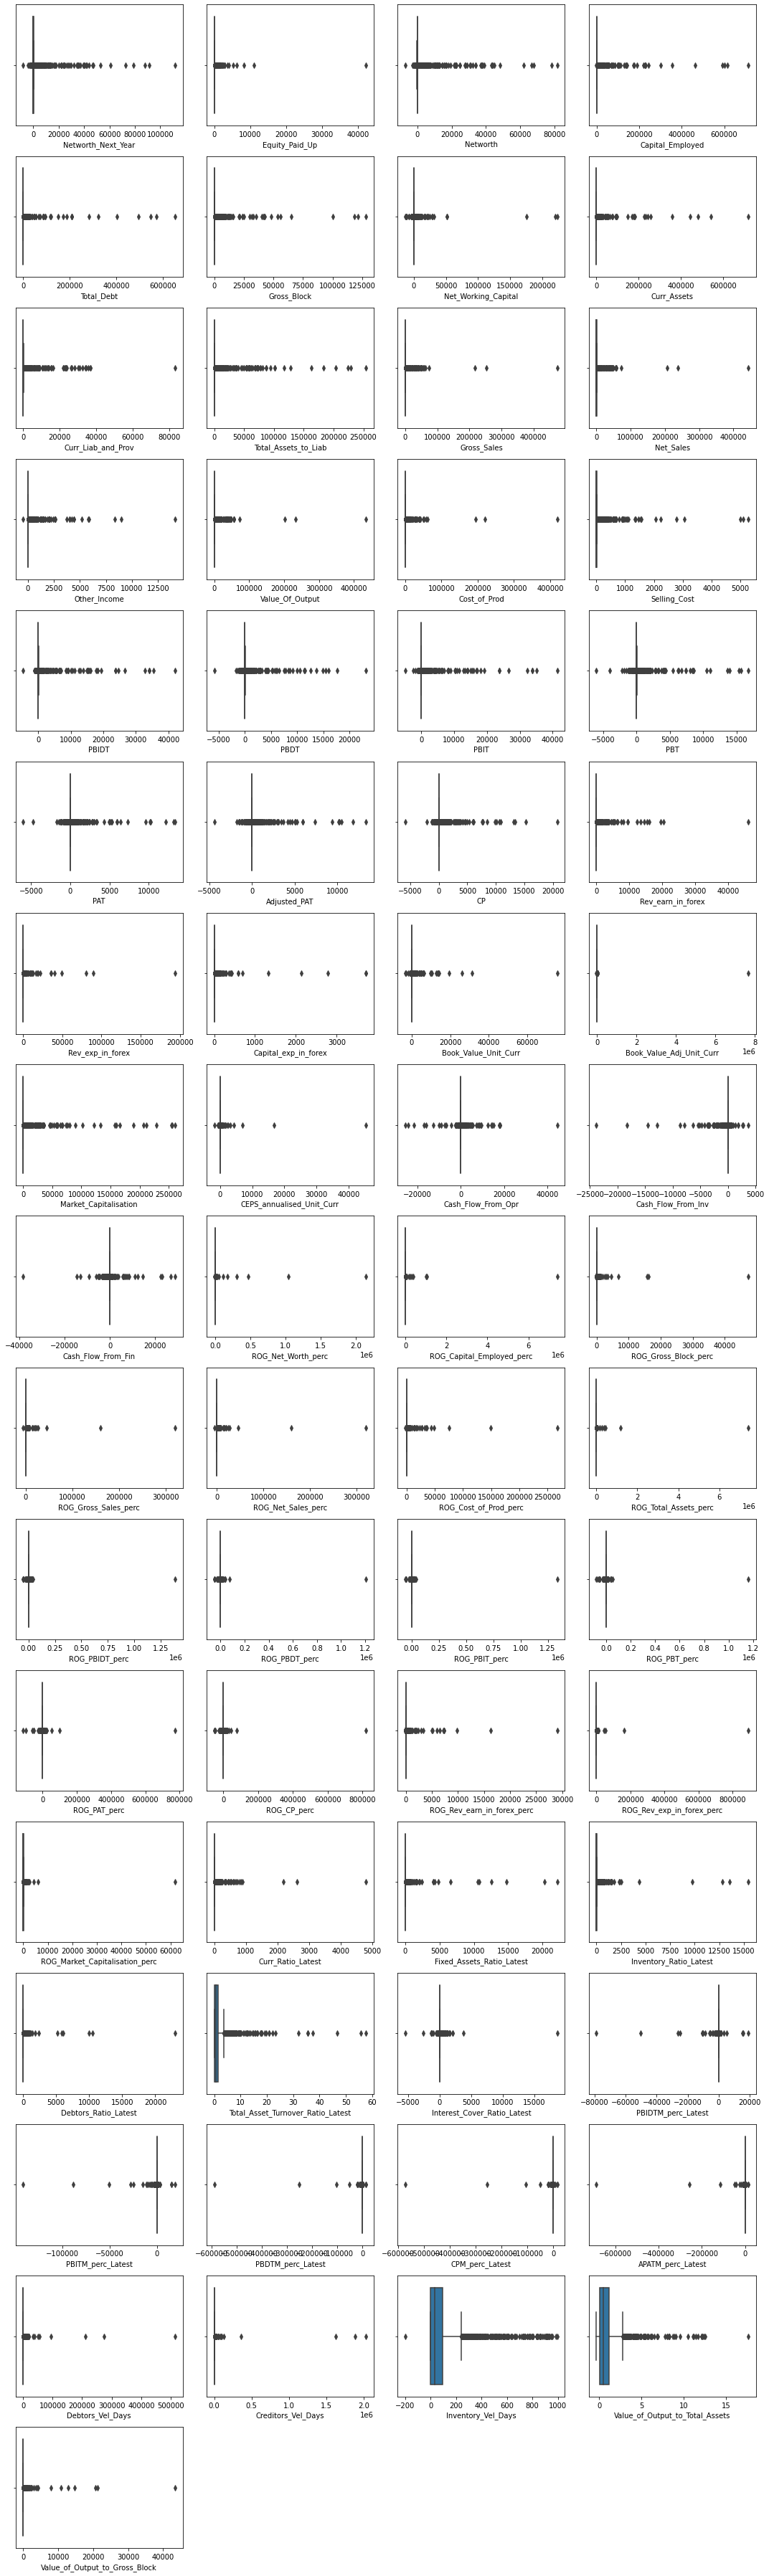

In [18]:
#Lets check for outliers in the data using boxplot
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.boxplot(data=df, x=col)
    plt.tight_layout()

We can see that there are outliers present in almost each feature.

In [19]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

IQR= q3-q1

LL = q1-1.5*IQR
UL = q3+1.5*IQR

In [20]:
((df<LL) | (df>UL)).sum().sum()/df.size*100 # 18 % datapoints are outliers in the dataset

18.032090608777725

In [21]:
print('The total number of outliers present in the data are',((df > UL) | (df < LL)).sum().sum())

The total number of outliers present in the data are 42031


#### Treating Outliers

In [22]:
def outliers_treatment(col):
    q1,q3 = df[col].quantile([0.25,0.75])
    IQR   = q3 - q1
    
    LL    = q1 - 1.5*IQR
    UL    = q3 + 1.5*IQR
    
    return df[col].apply(lambda x: LL if x<LL else x).apply(lambda x: UL if x>UL else x)

In [23]:
for i in df.select_dtypes(exclude='object').columns:
    df[i] = outliers_treatment(i)

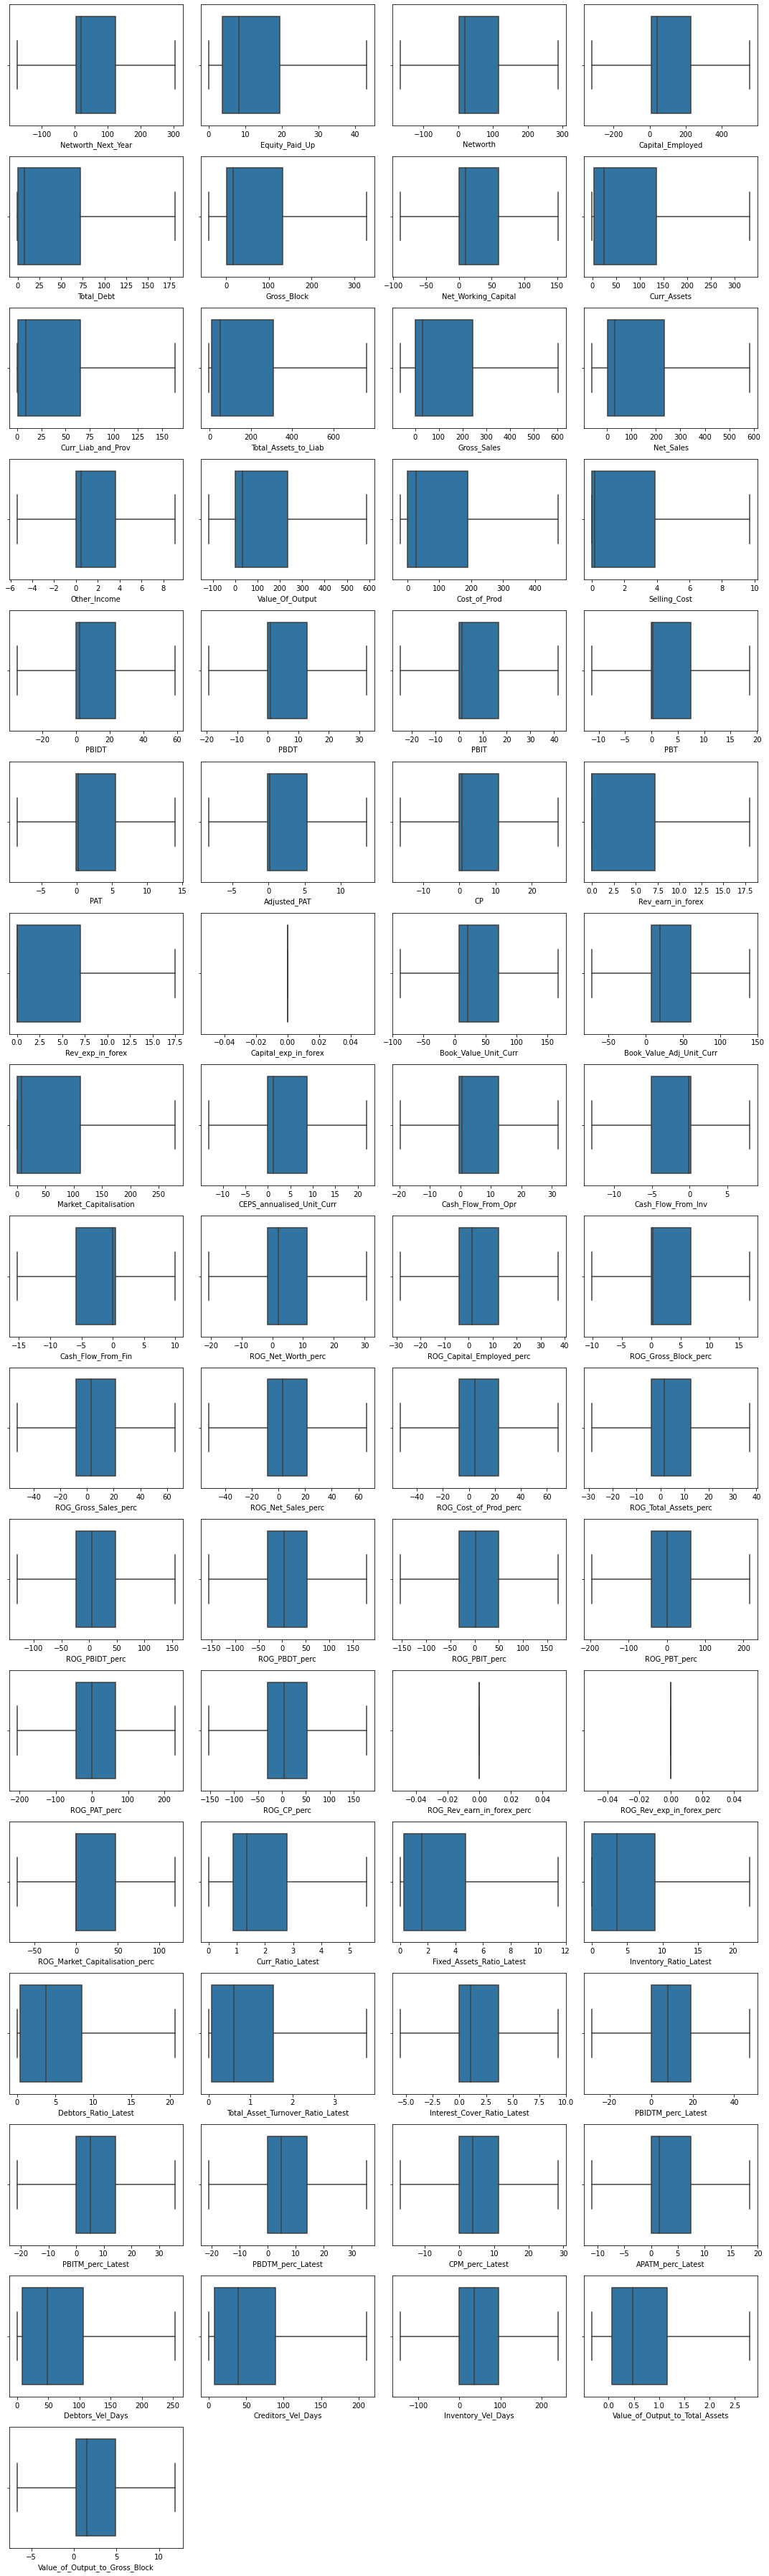

In [24]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    plt.subplot(17,4, i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

From the above plot, we can see that the outliers are treated.

### 1.2 Missing Value Treatment

#### Let's check for the missing values in the data and treat them

<AxesSubplot:>

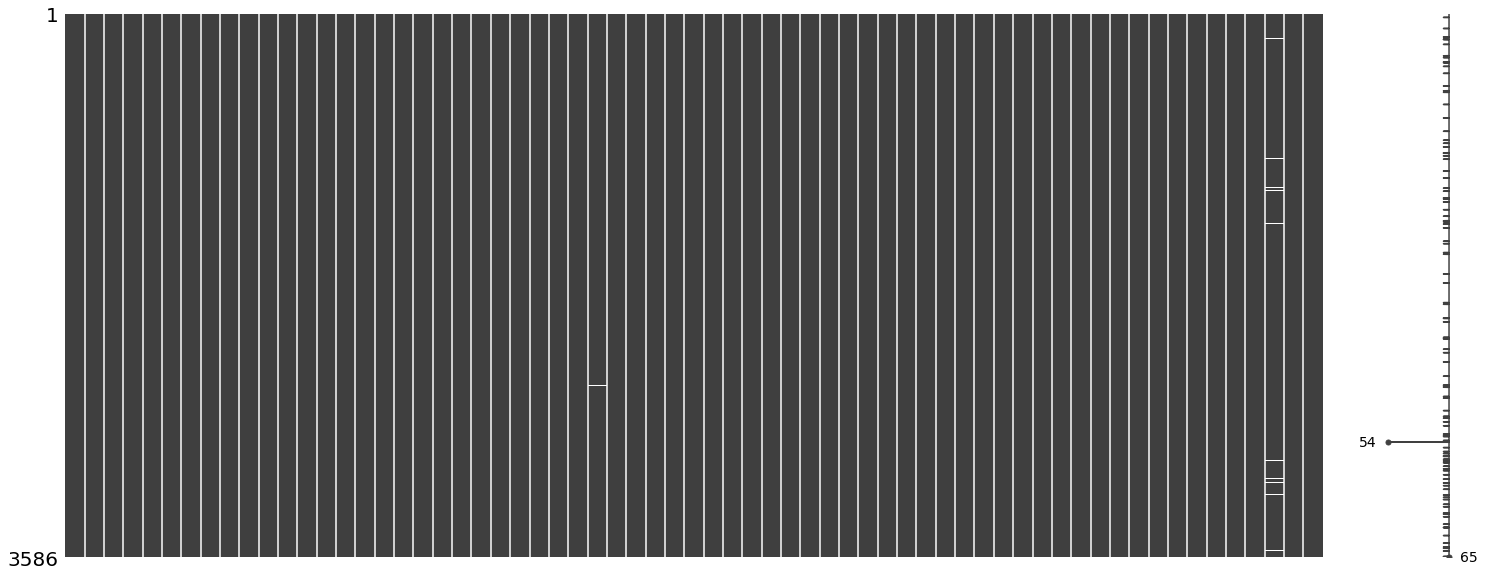

In [25]:
import missingno as msno
msno.matrix(df)

In [26]:
pd.set_option('display.max_rows', 500)

In [27]:
df.isna().sum().sort_values(ascending=False)

Inventory_Vel_Days                   103
Book_Value_Adj_Unit_Curr               4
Curr_Ratio_Latest                      1
PBITM_perc_Latest                      1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
PBIDTM_perc_Latest                     1
Interest_Cover_Ratio_Latest            1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
ROG_PBT_perc                           0
ROG_Net_Sales_perc                     0
ROG_Gross_Sales_perc                   0
ROG_Cost_of_Prod_perc                  0
ROG_Gross_Block_perc                   0
ROG_Total_Assets_perc                  0
ROG_PBIDT_perc                         0
ROG_PBDT_perc                          0
ROG_PBIT_perc                          0
Networth_Next_Year                     0
ROG_PAT_perc                           0
ROG_CP_perc     

In [28]:
df.isnull().sum().sum()/df.size*100 # 0.05% null values are present in the data

0.050624222403363506

In [29]:
print('The number of missing values in the data are',df.isnull().sum().sum())

The number of missing values in the data are 118


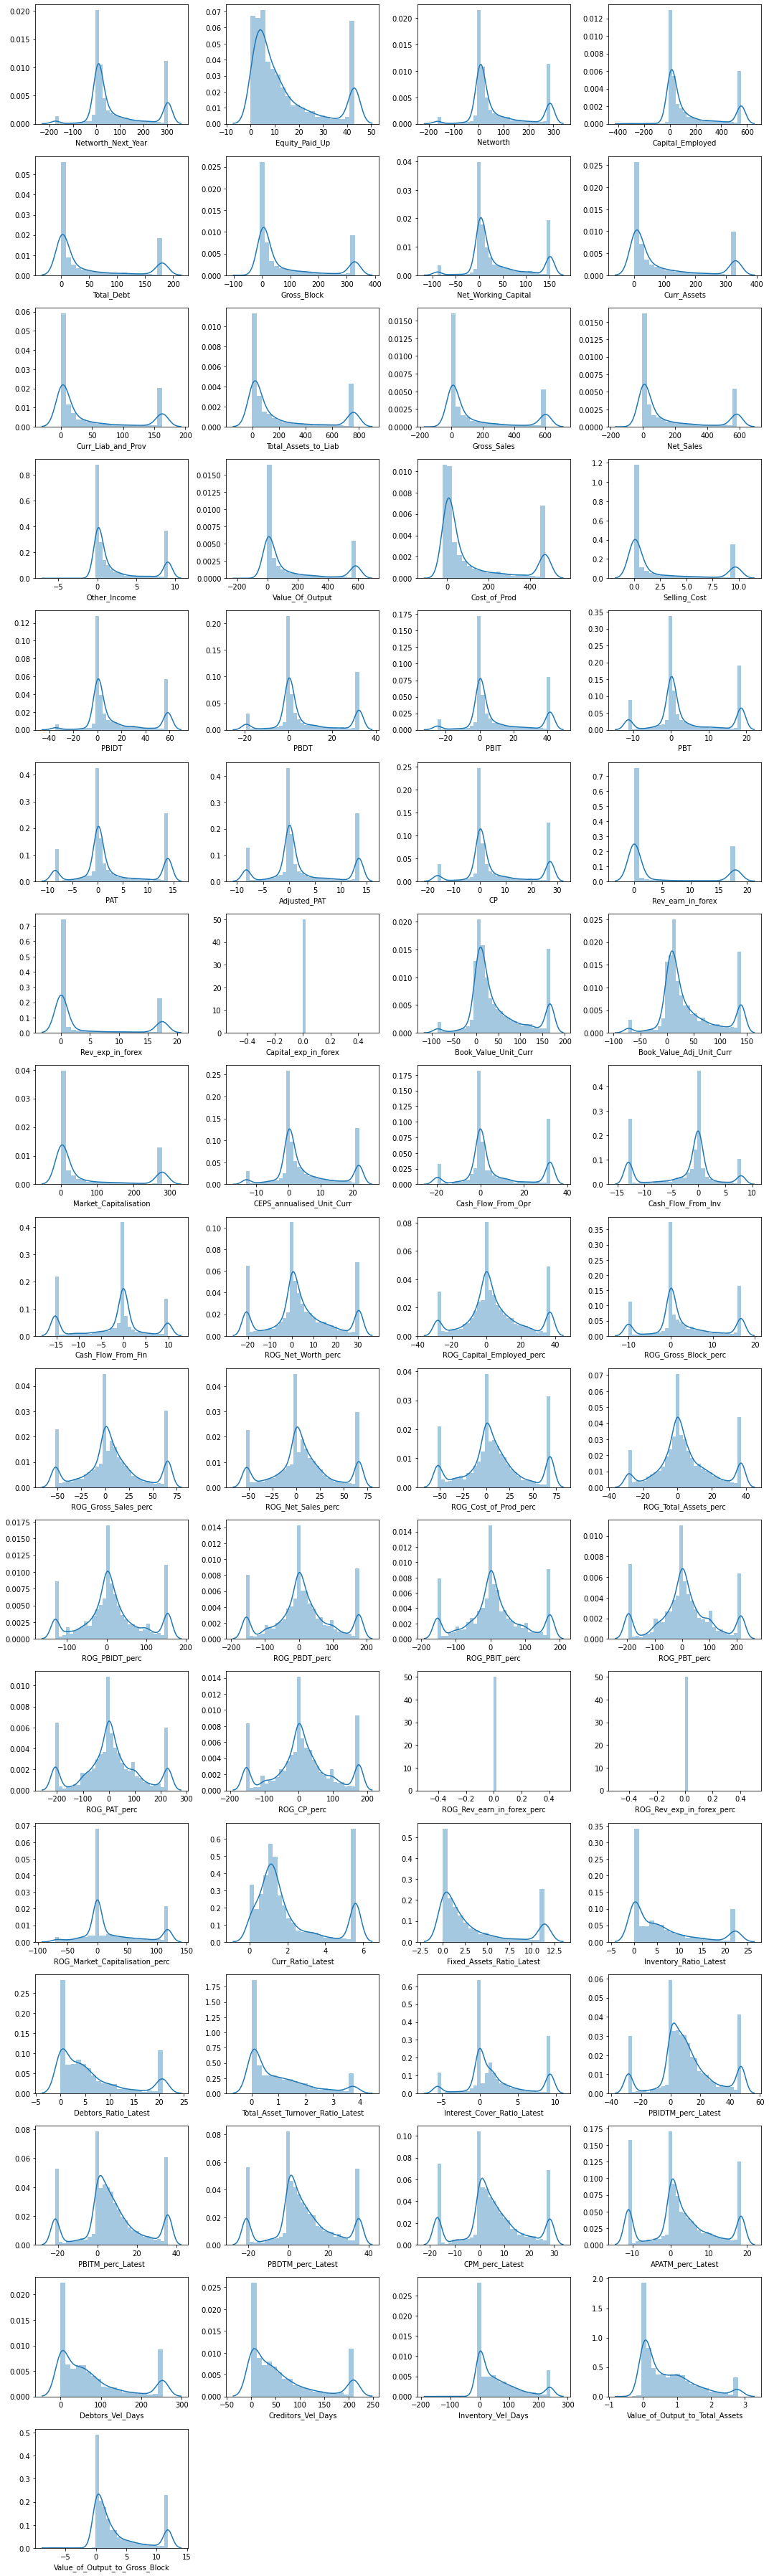

In [30]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.distplot(df[col])
    plt.tight_layout()

In [31]:
df.fillna(df.median(), inplace=True) # Null values are imputed with median

In [32]:
df.isnull().sum().sum()/df.size*100 # Percentage of null values in the data

0.0

In [33]:
print('The number of missing values in the data are',df.isnull().sum().sum())

The number of missing values in the data are 0


### 1.3 Transform Target variable into 0 and 1

In [34]:
df['Default'] = np.where(df.Networth_Next_Year<0, 1, 0)
networth_next_year = df[['Networth_Next_Year']]
df.drop('Networth_Next_Year', axis=1,inplace=True)

In [35]:
df.Default.value_counts()

0    3199
1     387
Name: Default, dtype: int64

In [36]:
df.Default.value_counts(normalize=True) #Proportion of Default Variable.

0    0.89208
1    0.10792
Name: Default, dtype: float64

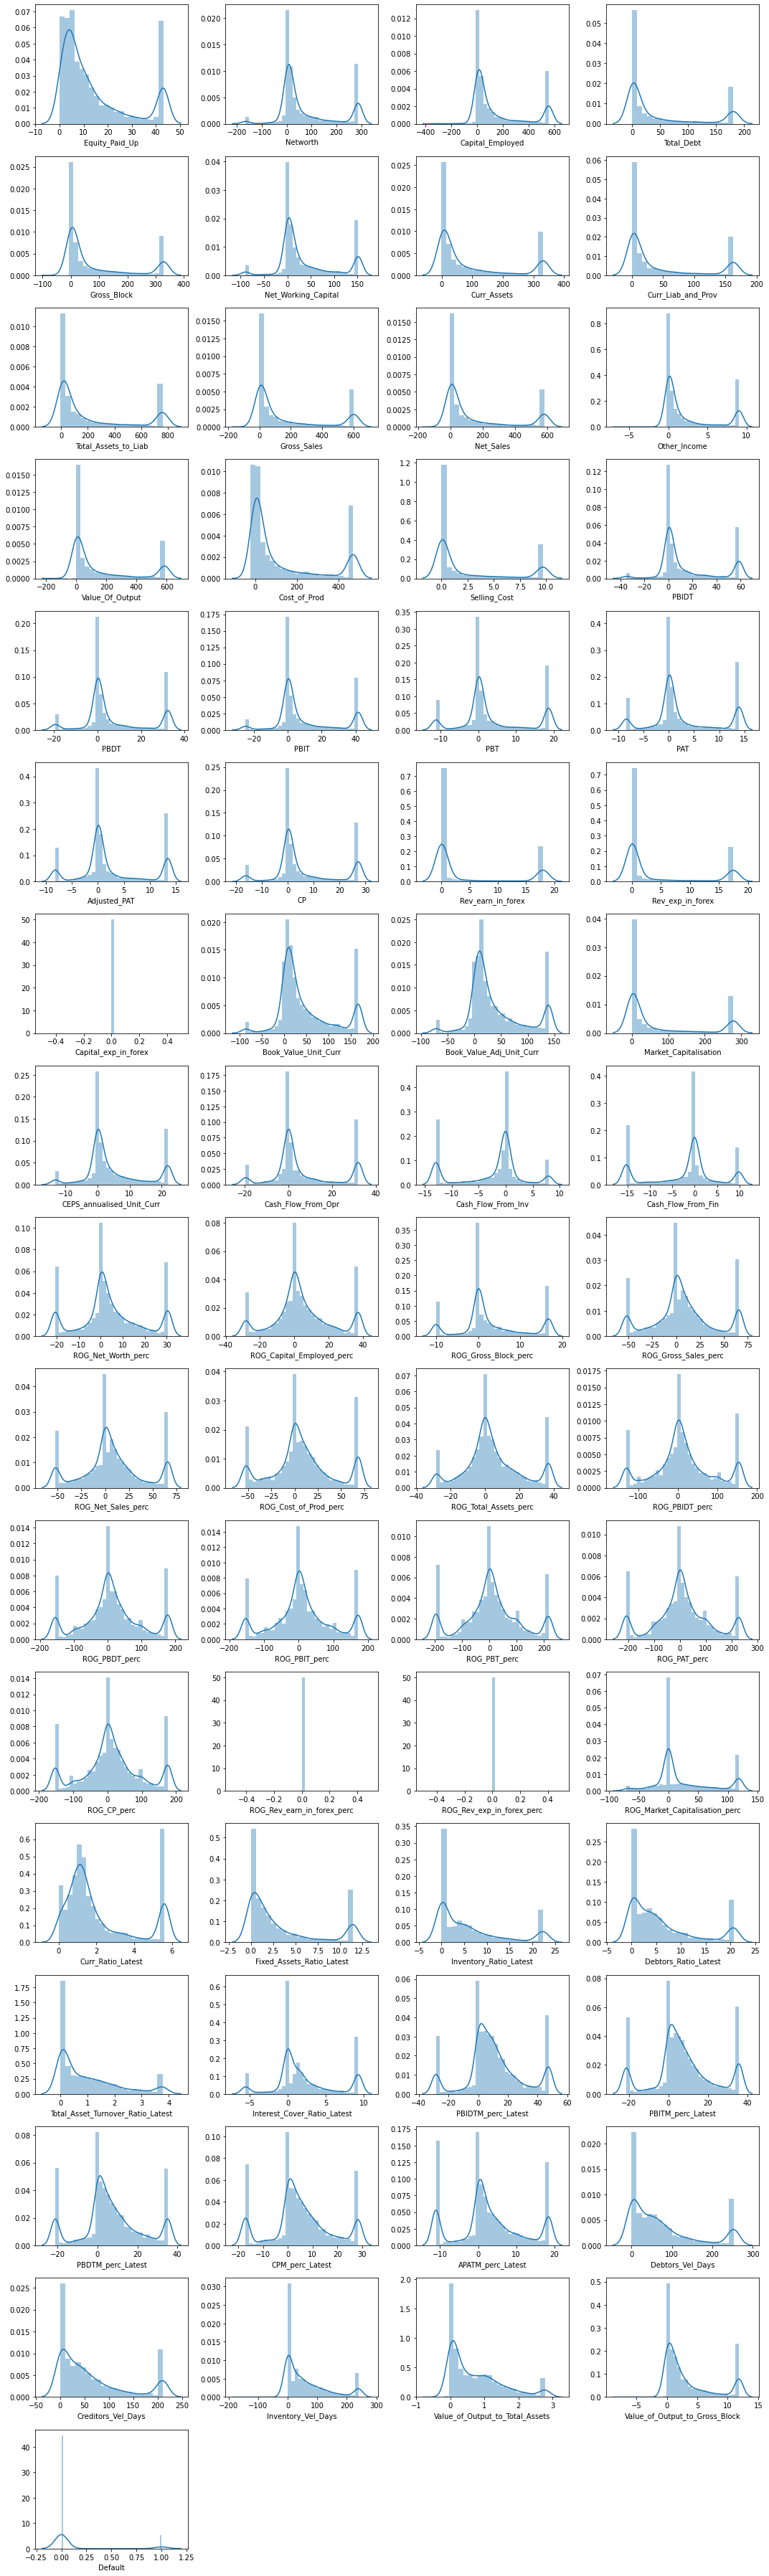

In [37]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.distplot(df[col])
    plt.tight_layout()

In [38]:
df.Default = df.Default.astype('object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Equity_Paid_Up                     3586 non-null   float64
 1   Networth                           3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Total_Debt                         3586 non-null   float64
 4   Gross_Block                        3586 non-null   float64
 5   Net_Working_Capital                3586 non-null   float64
 6   Curr_Assets                        3586 non-null   float64
 7   Curr_Liab_and_Prov                 3586 non-null   float64
 8   Total_Assets_to_Liab               3586 non-null   float64
 9   Gross_Sales                        3586 non-null   float64
 10  Net_Sales                          3586 non-null   float64
 11  Other_Income                       3586 non-null   float

<AxesSubplot:xlabel='Default', ylabel='count'>

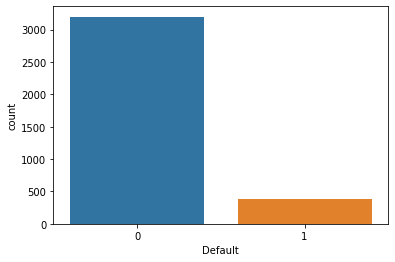

In [40]:
sns.countplot(df['Default'])

In [41]:
df.groupby(df['Default']).sum()

Equity_Paid_Up   Networth  Capital_Employed  Total_Debt  Gross_Block  \
Default                                                                         
0           44362.58125  277888.35       519810.1975   146312.33    272683.16   
1            5822.23875  -13631.99        27017.3775    23804.47     32484.95   

         Net_Working_Capital   Curr_Assets  Curr_Liab_and_Prov  \
Default                                                          
0               129429.13625  304365.66625        139074.56000   
1                 2536.47750   23272.88750         16982.72125   

         Total_Assets_to_Liab  Gross_Sales  ...  PBIDTM_perc_Latest  \
Default                                     ...                       
0                  694957.885  538744.8650  ...           39009.420   
1                   52875.260   33262.2275  ...           -1183.075   

         PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
Default                                                          
0                27630.235          25855.610        20544.985   
1                -1760.860          -1944.745        -1463.985   

         APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
Default                                                            
0                11482.070          239884.0            187188.5   
1                -1365.355           30094.0             36724.0   

         Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
Default                                                        
0                  196425.0                         2452.365   
1                   23124.0                          168.585   

         Value_of_Output_to_Gross_Block  
Default                                  
0                              11631.39  
1                                405.23  

[2 rows x 64 columns]

### 1.4 Univariate & Bivariate Analysis

### Univariate Analysis

In [42]:
df.describe().T

count        mean         std        min  \
Equity_Paid_Up                     3586.0   13.994651   14.001442    0.00000   
Networth                           3586.0   73.691121  112.937394 -166.21500   
Capital_Employed                   3586.0  152.489564  207.868131 -320.90125   
Total_Debt                         3586.0   47.439152   68.217338   -0.72000   
Gross_Block                        3586.0   85.099863  121.230109  -41.19000   
Net_Working_Capital                3586.0   36.800227   59.347261  -89.40625   
Curr_Assets                        3586.0   91.366022  122.085815   -0.91000   
Curr_Liab_and_Prov                 3586.0   43.518483   60.878782   -0.23000   
Total_Assets_to_Liab               3586.0  208.542427  280.419359   -4.51000   
Gross_Sales                        3586.0  159.511180  224.244869  -62.59000   
Net_Sales                          3586.0  154.121439  216.700894  -62.59000   
Other_Income                       3586.0    2.434778    3.440992   -5.40250   
Value_Of_Output                    3586.0  154.889446  217.848047 -119.10000   
Cost_of_Prod                       3586.0  124.595792  174.932864  -22.65000   
Selling_Cost                       3586.0    2.478154    3.720671    0.00000   
PBIDT                              3586.0   14.161569   23.752052  -35.18750   
PBDT                               3586.0    7.013376   14.217803  -19.41750   
PBIT                               3586.0    9.393051   17.456131  -25.00125   
PBT                                3586.0    3.494844    8.714200  -11.28375   
PAT                                3586.0    2.583009    6.563022   -8.46000   
Adjusted_PAT                       3586.0    2.407965    6.361349   -8.23875   
CP                                 3586.0    5.935719   11.963796  -16.36500   
Rev_earn_in_forex                  3586.0    4.492794    7.380730    0.00000   
Rev_exp_in_forex                   3586.0    4.370090    7.024458    0.00000   
Capital_exp_in_forex               3586.0    0.000000    0.000000    0.00000   
Book_Value_Unit_Curr               3586.0   45.460531   60.086473  -87.59500   
Book_Value_Adj_Unit_Curr           3586.0   38.138709   50.129294  -72.36500   
Market_Capitalisation              3586.0   72.370378  107.359374    0.00000   
CEPS_annualised_Unit_Curr          3586.0    4.816161    8.991216  -13.15875   
Cash_Flow_From_Opr                 3586.0    6.411553   14.372588  -19.74000   
Cash_Flow_From_Inv                 3586.0   -2.453100    5.998657  -12.97375   
Cash_Flow_From_Fin                 3586.0   -2.237539    7.585471  -15.30500   
ROG_Net_Worth_perc                 3586.0    4.123604   14.300085  -20.76250   
ROG_Capital_Employed_perc          3586.0    4.351926   16.916967  -28.46875   
ROG_Gross_Block_perc               3586.0    2.946049    7.652767  -10.08000   
ROG_Gross_Sales_perc               3586.0    6.635307   32.007348  -52.48125   
ROG_Net_Sales_perc                 3586.0    6.634232   32.056429  -52.64500   
ROG_Cost_of_Prod_perc              3586.0    7.889492   33.097493  -52.79000   
ROG_Total_Assets_perc              3586.0    4.274319   16.373758  -28.68125   
ROG_PBIDT_perc                     3586.0   12.605595   75.031601 -130.21875   
ROG_PBDT_perc                      3586.0   11.284433   87.304064 -155.86625   
ROG_PBIT_perc                      3586.0    9.955165   85.416812 -153.59500   
ROG_PBT_perc                       3586.0    8.286174  106.668670 -196.02375   
ROG_PAT_perc                       3586.0    9.353691  111.888935 -207.35250   
ROG_CP_perc                        3586.0   12.059554   87.096692 -153.12375   
ROG_Rev_earn_in_forex_perc         3586.0    0.000000    0.000000    0.00000   
ROG_Rev_exp_in_forex_perc          3586.0    0.000000    0.000000    0.00000   
ROG_Market_Capitalisation_perc     3586.0   23.411672   48.960825  -71.27250   
Curr_Ratio_Latest                  3586.0    2.084084    1.806351    0.00000   
Fixed_Assets_Ratio_Latest          3

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Equity_Paid_Up                     3586 non-null   float64
 1   Networth                           3586 non-null   float64
 2   Capital_Employed                   3586 non-null   float64
 3   Total_Debt                         3586 non-null   float64
 4   Gross_Block                        3586 non-null   float64
 5   Net_Working_Capital                3586 non-null   float64
 6   Curr_Assets                        3586 non-null   float64
 7   Curr_Liab_and_Prov                 3586 non-null   float64
 8   Total_Assets_to_Liab               3586 non-null   float64
 9   Gross_Sales                        3586 non-null   float64
 10  Net_Sales                          3586 non-null   float64
 11  Other_Income                       3586 non-null   float

In [44]:
df.shape

(3586, 65)

In [45]:
df.Total_Debt.max() # Maximum Total_debt

180.83000000000004

### Bivariate Analysis

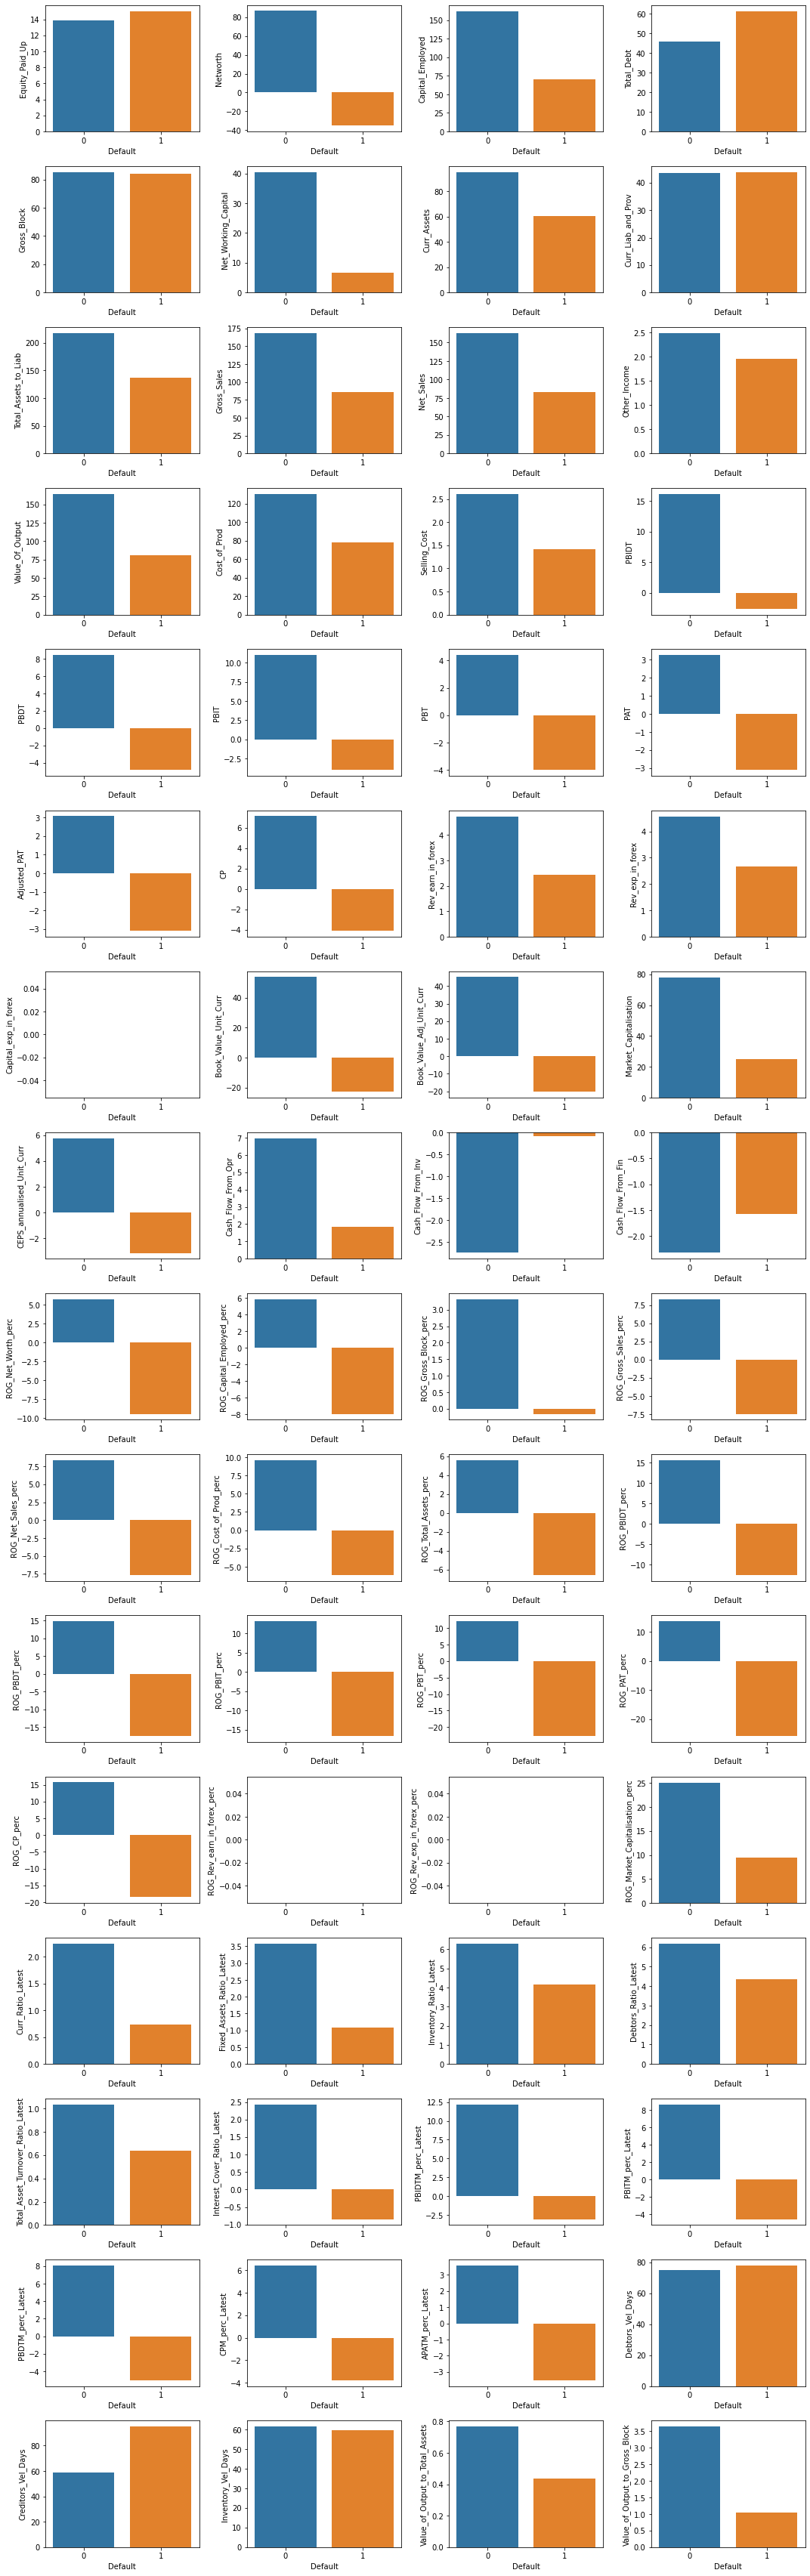

In [46]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.barplot(x = df['Default'], y = df[col],ci=None)
    plt.tight_layout()

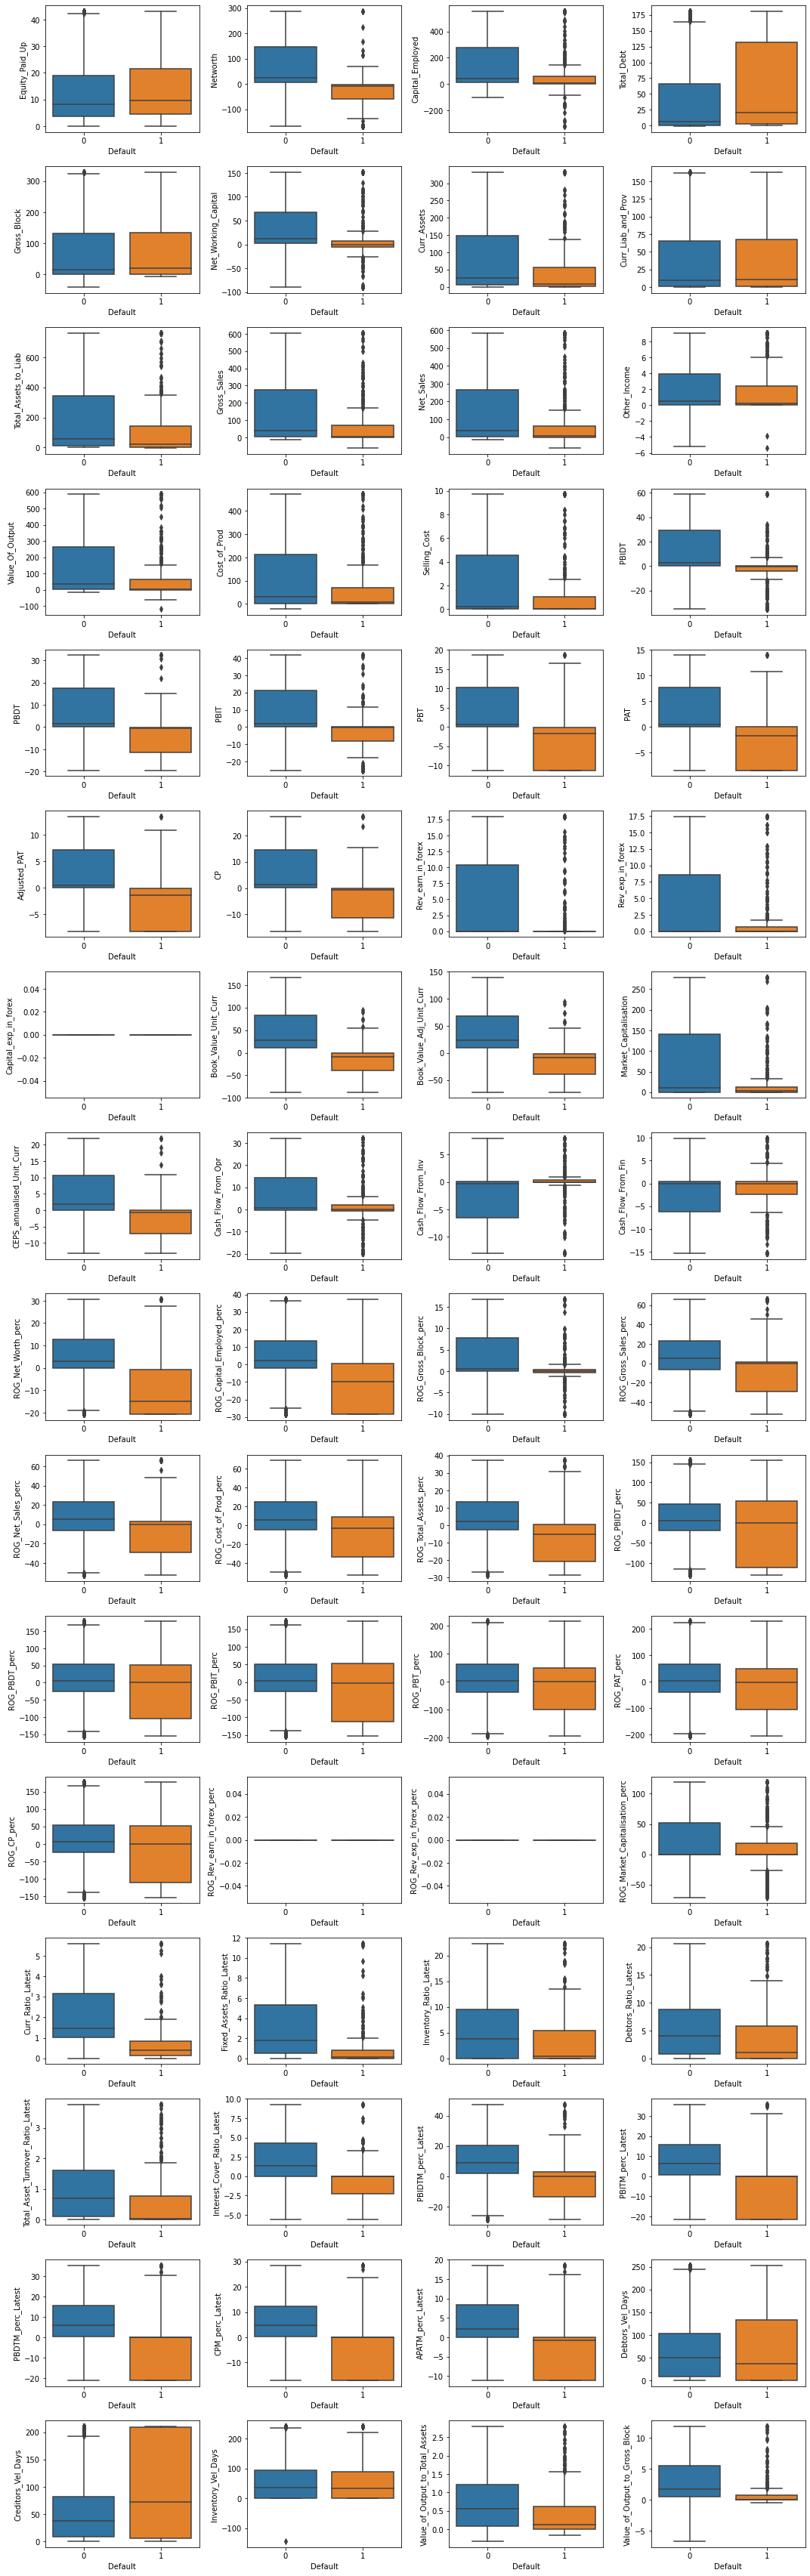

In [47]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.boxplot(data= df, y=col, x='Default')
    plt.tight_layout()

We can see some outliers are present in the default feature.

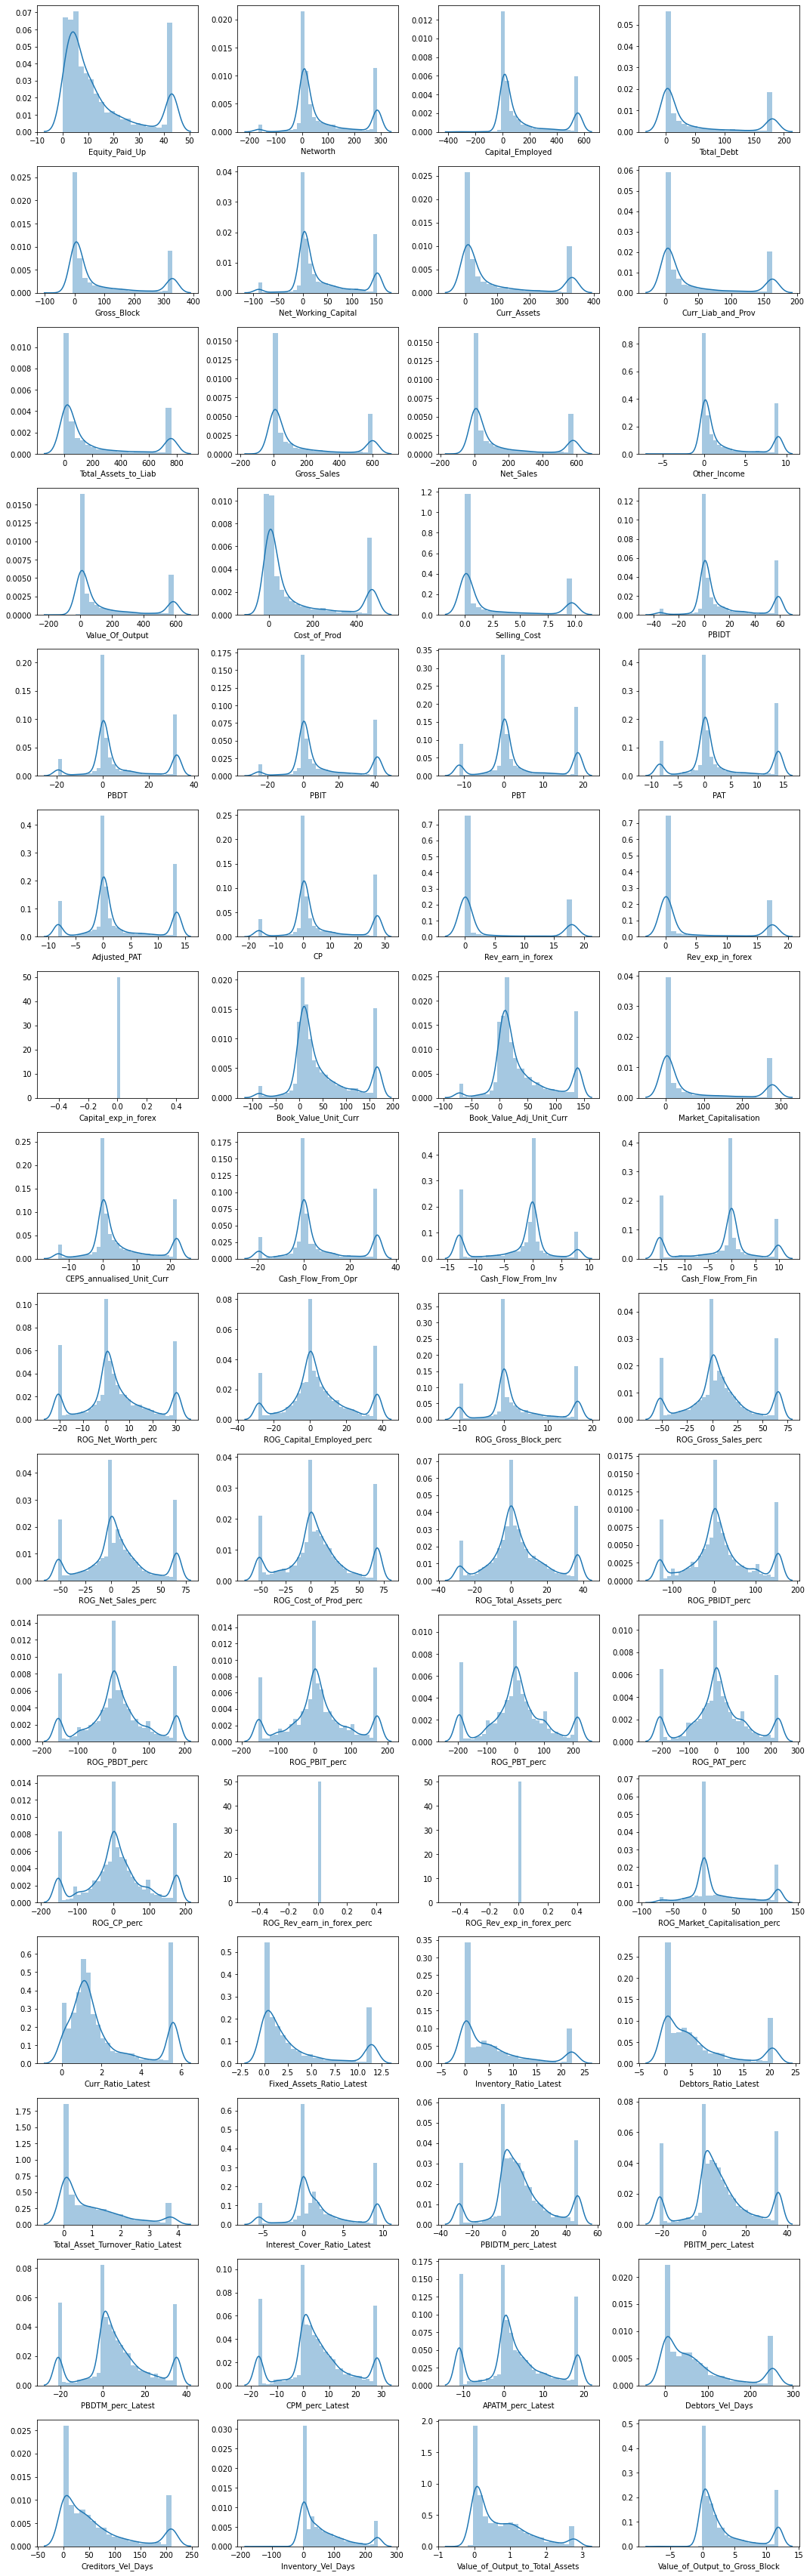

In [48]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.select_dtypes(exclude='object')):
    plt.subplot(17,4, i+1)
    sns.distplot(df[col])
    plt.tight_layout()

### Multivariate Analysis

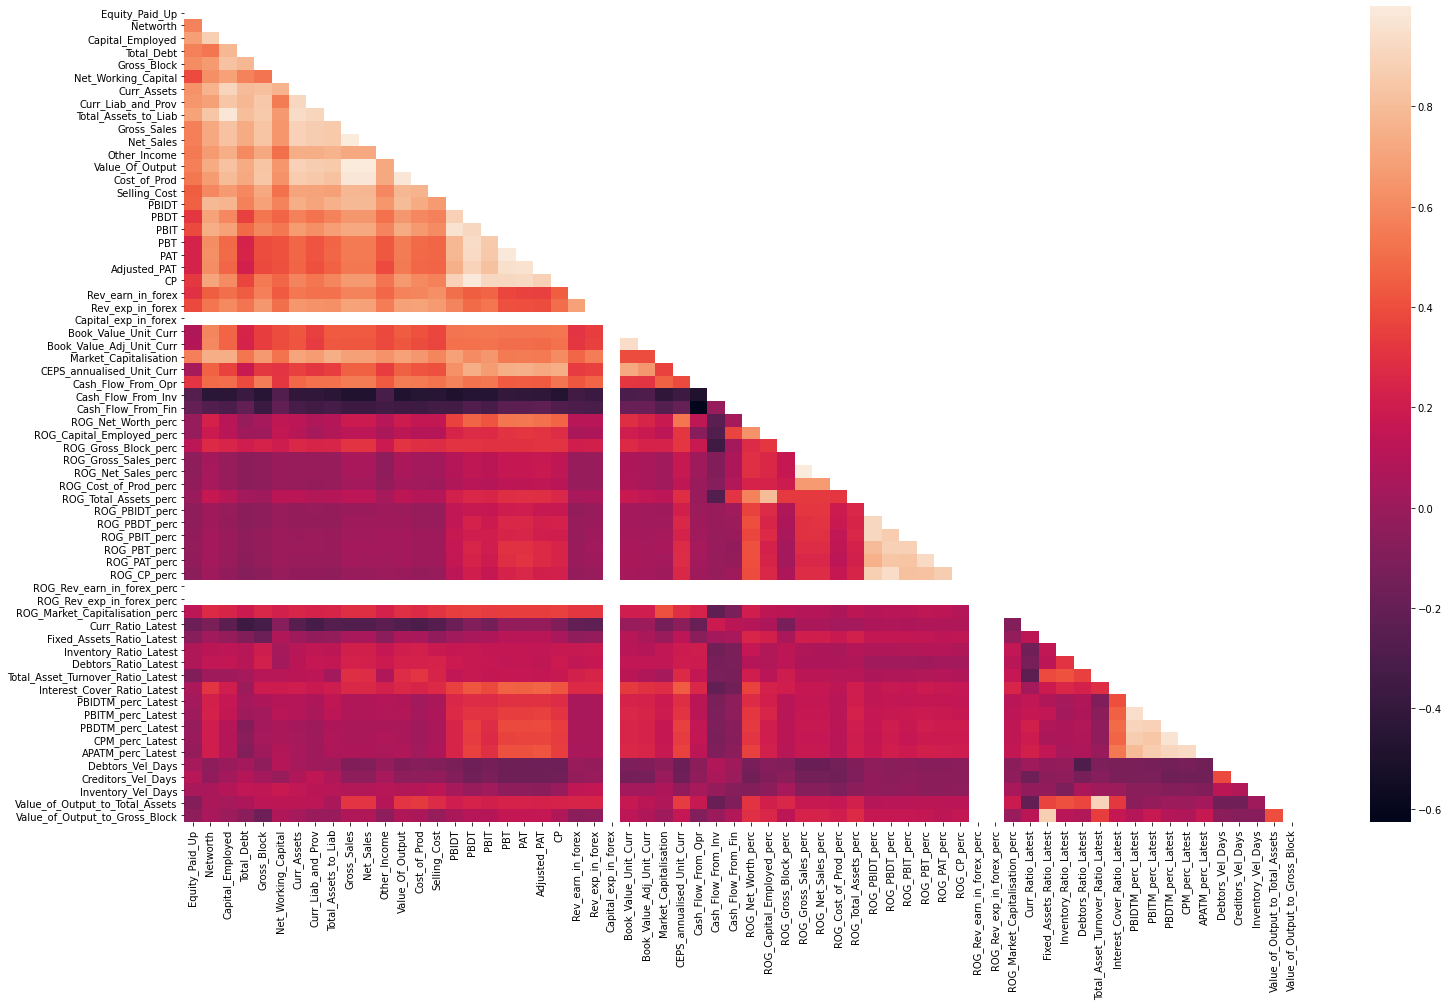

In [49]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), mask=np.triu(df.corr()))
plt.savefig("Heatmap")

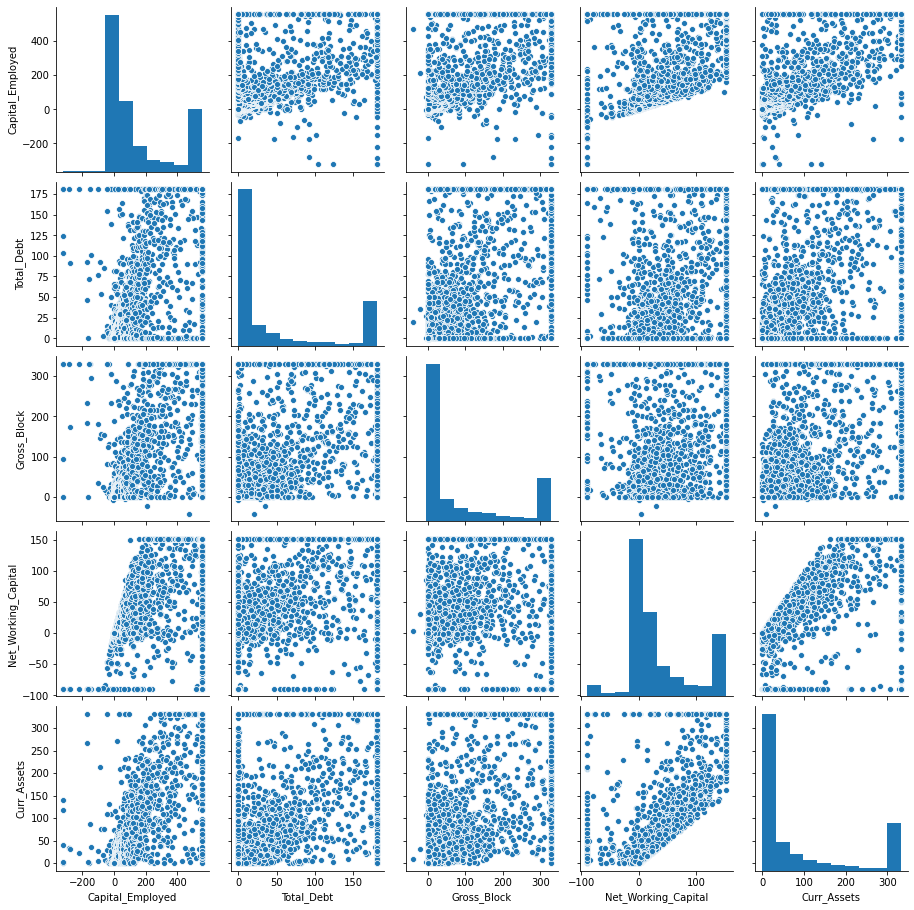

In [50]:
sns.pairplot(df.iloc[:,2:7])

#### Encoding the data before train test split

In [51]:
for i in df.select_dtypes(include='object').columns:
    df[i] = pd.Categorical(df[i]).codes

In [52]:
df

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0           43.16875  -166.215        -320.90125      180.83     328.8825   
1           43.16875  -166.215         555.10875      180.83     328.8825   
2           43.16875   287.405         555.10875      180.83     328.8825   
3           43.16875  -166.215         555.10875      180.83     328.8825   
4           43.16875  -166.215         555.10875      180.83     328.8825   
...              ...       ...               ...         ...          ...   
3581        43.16875   287.405         555.10875      180.83     328.8825   
3582        43.16875   287.405         555.10875      180.83     328.8825   
3583        43.16875   287.405         555.10875      180.83     328.8825   
3584        43.16875   287.405         555.10875      180.83     328.8825   
3585        43.16875   287.405         555.10875      180.83     328.8825   

      Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0               -89.40625     40.50000           163.02625   
1               -89.40625    332.19375           163.02625   
2               151.52375    332.19375           163.02625   
3               -89.40625    332.19375           163.02625   
4               151.52375    332.19375           163.02625   
...                   ...          ...                 ...   
3581              0.00000    332.19375           163.02625   
3582            151.52375    332.19375           163.02625   
3583            151.52375    332.19375           163.02625   
3584            151.52375    332.19375           163.02625   
3585            -89.40625    332.19375           163.02625   

      Total_Assets_to_Liab  Gross_Sales  ...  PBITM_perc_Latest  \
0                 109.6000      0.00000  ...              0.000   
1                 760.5175    603.46125  ...            -21.435   
2                 760.5175    392.13000  ...            -21.435   
3                 760.5175    603.46125  ...             -7.210   
4                 760.5175     38.72000  ...            -21.435   
...                    ...          ...  ...                ...   
3581              760.5175    603.46125  ...              0.000   
3582              760.5175    603.46125  ...             32.170   
3583              760.5175    603.46125  ...              6.690   
3584              760.5175    603.46125  ...             20.550   
3585              760.5175    603.46125  ...             22.880   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
0                 0.000            0.000              0.000               0.0   
1               -21.165          -17.085            -11.115              29.0   
2               -21.165          -17.085            -11.115              97.0   
3               -21.165          -17.085            -11.115              93.0   
4               -21.165           28.475             18.525             253.0   
...                 ...              ...                ...               ...   
3581              0.000            0.000              0.000               0.0   
3582             29.810           28.475             18.525              13.0   
3583              7.310            5.690              4.290               7.0   
3584             23.390           19.550             11.990              32.0   
3585             34.040           25.970              6.370              18.0   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0                    0.0                45.0                             0.00   
1                  101.0                 2.0                             0.31   
2                  210.5                 0.0                            -0.03   
3                   63.0                 2.0                             0.24   
4                  210.5                 0.0                             0.01   
...                  ...                 ...                            

In [53]:
df.head()

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0        43.16875  -166.215        -320.90125      180.83     328.8825   
1        43.16875  -166.215         555.10875      180.83     328.8825   
2        43.16875   287.405         555.10875      180.83     328.8825   
3        43.16875  -166.215         555.10875      180.83     328.8825   
4        43.16875  -166.215         555.10875      180.83     328.8825   

   Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  Total_Assets_to_Liab  \
0            -89.40625     40.50000           163.02625              109.6000   
1            -89.40625    332.19375           163.02625              760.5175   
2            151.52375    332.19375           163.02625              760.5175   
3            -89.40625    332.19375           163.02625              760.5175   
4            151.52375    332.19375           163.02625              760.5175   

   Gross_Sales  ...  PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0      0.00000  ...              0.000              0.000            0.000   
1    603.46125  ...            -21.435            -21.165          -17.085   
2    392.13000  ...            -21.435            -21.165          -17.085   
3    603.46125  ...             -7.210            -21.165          -17.085   
4     38.72000  ...            -21.435            -21.165           28.475   

   APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0              0.000               0.0                 0.0   
1            -11.115              29.0               101.0   
2            -11.115              97.0               210.5   
3            -11.115              93.0                63.0   
4             18.525             253.0               210.5   

   Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
0                45.0                             0.00   
1                 2.0                             0.31   
2                 0.0                            -0.03   
3                 2.0                             0.24   
4                 0.0                             0.01   

   Value_of_Output_to_Gross_Block  Default  
0                            0.00        1  
1                            0.24        1  
2                           -0.26        1  
3                            1.90        1  
4                            0.05        1  

[5 rows x 65 columns]

### 1.5 Train Test Split

In [54]:
X = df.drop(['Default'], axis=1)
y = df.Default

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y, train_size=0.67, random_state=42)

In [57]:
X_train.head() #First 5 rows of train data

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
662             3.00     2.680           2.72000        0.00       1.0100   
1373            2.09     9.740           9.83000        0.00       1.0100   
3268           25.70   287.405         555.10875      180.83     328.8825   
3246           35.03   287.405         555.10875      180.83     328.8825   
1456            2.50     8.270          15.14000        6.87       7.5400   

      Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
662               1.15000      1.17000             0.01000   
1373              2.35000      2.71000             0.36000   
3268            151.52375    332.19375           163.02625   
3246            151.52375    332.19375           163.02625   
1456              8.80000      9.67000             0.88000   

      Total_Assets_to_Liab  Gross_Sales  ...  PBIDTM_perc_Latest  \
662                 2.7300      0.30000  ...             -28.485   
1373               10.1900      0.16000  ...              47.475   
3268              760.5175    603.46125  ...               8.260   
3246              760.5175    210.78000  ...              47.475   
1456               16.0200     59.13000  ...               5.160   

      PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
662             -21.435            -21.165          -17.085   
1373             35.725             35.275           28.475   
3268              5.910            -18.470          -17.020   
3246             35.725             35.275           28.475   
1456              3.810              4.160            3.300   

      APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
662             -11.115             253.0                 0.0   
1373             18.525               0.0                 0.0   
3268            -11.115             206.0                49.0   
3246             18.525             253.0               210.5   
1456              1.940               0.0                 2.0   

      Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
662                  3.0                            0.100   
1373               240.0                            0.040   
3268                27.0                            0.370   
3246                 0.0                            0.010   
1456                56.0                            2.795   

      Value_of_Output_to_Gross_Block  
662                             0.23  
1373                            0.39  
3268                            2.83  
3246                            0.04  
1456                            5.92  

[5 rows x 64 columns]

In [58]:
X_test.head() #First 5 rows of test data

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
3163        16.79000   287.405         555.10875      180.83     328.8825   
3133        43.16875   287.405         555.10875      180.83     328.8825   
937          5.19000     4.390           4.39000        0.00       0.0400   
196          3.81000   -10.210          17.17000       15.16      25.8400   
2852        25.88000   194.120         271.36000       53.59     283.7700   

      Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
3163            151.52375    332.19375           163.02625   
3133             10.08000    157.02000           146.94000   
937               4.39000      4.43000             0.04000   
196              -4.07000      7.94000            12.00000   
2852             85.21000    122.50000            37.29000   

      Total_Assets_to_Liab  Gross_Sales  ...  PBIDTM_perc_Latest  \
3163              760.5175    603.46125  ...                2.33   
3133              760.5175    603.46125  ...               12.65   
937                 4.4300      0.48000  ...                0.00   
196                29.1700     17.72000  ...                3.97   
2852              308.6500    287.02000  ...                8.10   

      PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
3163               1.86               0.52             0.52   
3133               7.21              11.29             9.35   
937                0.00               0.00             0.00   
196                0.33              -5.75            -5.75   
2852               3.75               5.82             5.38   

      APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
3163               0.05              20.0                76.0   
3133               3.91              19.0                 2.0   
937                0.00               0.0                 0.0   
196               -9.39               6.0                69.0   
2852               1.03              57.0                35.0   

      Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
3163                43.0                             2.01   
3133                11.0                             1.91   
937                 35.0                             0.00   
196                 52.0                             0.00   
2852                88.0                             1.44   

      Value_of_Output_to_Gross_Block  
3163                            7.82  
3133                            1.72  
937                             0.00  
196                             0.00  
2852                            1.50  

[5 rows x 64 columns]

In [59]:
train_labels.head()

662     0
1373    0
3268    0
3246    0
1456    0
Name: Default, dtype: int8

In [60]:
test_labels.head()

3163    0
3133    0
937     0
196     1
2852    0
Name: Default, dtype: int8

In [61]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns= X_train.columns, index= X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns= X_test.columns, index= X_test.index)

In [62]:
X_train_concat = pd.concat([X_train_sc, train_labels], axis=1)

In [63]:
X_train_concat

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
662        -0.789353 -0.639564         -0.724589   -0.686793    -0.682456   
1373       -0.853915 -0.576852         -0.690283   -0.686793    -0.682456   
3268        0.821167  1.889550          1.940709    1.963673     2.053170   
3246        1.483111  1.889550          1.940709    1.963673     2.053170   
1456       -0.824827 -0.589910         -0.664662   -0.586098    -0.627973   
...              ...       ...               ...         ...          ...   
1130       -0.944729 -0.609896         -0.708232   -0.686793    -0.681205   
1294       -0.556643 -0.598171         -0.698968   -0.677705    -0.669858   
860        -0.621206 -0.664968         -0.736700   -0.681077    -0.690883   
3507        2.060539  1.889550          1.940709   -0.686793     2.053170   
3174       -0.007506  1.889550          1.940709    1.963673     0.794689   

      Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
662             -0.598203    -0.735422           -0.707302   
1373            -0.577759    -0.722706           -0.701499   
3268             1.963647     1.997939            1.995578   
3246             1.963647     1.997939            1.995578   
1456            -0.467873    -0.665235           -0.692877   
...                   ...          ...                 ...   
1130            -0.605358    -0.734101           -0.697685   
1294            -0.512339    -0.661354           -0.641975   
860             -0.621202    -0.745000           -0.704152   
3507            -2.140969     1.997939            1.995578   
3174             1.963647     1.997939            0.031025   

      Total_Assets_to_Liab  Gross_Sales  ...  PBITM_perc_Latest  \
662              -0.735106    -0.701388  ...          -1.854698   
1373             -0.708428    -0.702025  ...           1.828601   
3268              1.974904     2.041329  ...          -0.092630   
3246              1.974904     0.255714  ...           1.828601   
1456             -0.687578    -0.433874  ...          -0.227951   
...                    ...          ...  ...                ...   
1130             -0.720909    -0.689838  ...          -0.179622   
1294             -0.702026    -0.644229  ...           0.000806   
860              -0.743403    -0.702752  ...           0.177367   
3507              1.974904     2.041329  ...           0.725738   
3174              1.974904    -0.115249  ...           1.828601   

      PBDTM_perc_Latest  CPM_perc_Latest  APATM_perc_Latest  Debtors_Vel_Days  \
662           -1.825965        -1.800078          -1.577937          2.156787   
1373           1.865818         1.861153           1.780604         -0.917336   
3268          -1.649683        -1.794855          -1.577937          1.585705   
3246           1.865818         1.861153           1.780604          2.156787   
1456          -0.169438        -0.161927          -0.098661         -0.917336   
...                 ...              ...                ...               ...   
1130          -0.168130        -0.213357          -0.060135         -0.249049   
1294           0.130144         0.271217           0.326256          0.893116   
860            0.219102         0.225412           0.601602         -0.917336   
3507           0.846392         0.711594           1.156826         -0.807980   
3174           1.865818         1.861153           1.780604         -0.917336   

      Creditors_Vel_Days  Inventory_Vel_Days  Value_of_Output_to_Total_Assets  \
662            -0.911035           -0.789511                        -0.806555   
1373           -0.911035            2.446419                        -0.884781   
3268           -0.191139           -0.461822                        -0.454538   
3246            2.181576           -0.830472                        -0.923894   
1456           -0.881651           -0.065864                         2.707095   
...                  ...                 ...                            

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
df.iloc[:,:-1]

Equity_Paid_Up  Networth  Capital_Employed  Total_Debt  Gross_Block  \
0           43.16875  -166.215        -320.90125      180.83     328.8825   
1           43.16875  -166.215         555.10875      180.83     328.8825   
2           43.16875   287.405         555.10875      180.83     328.8825   
3           43.16875  -166.215         555.10875      180.83     328.8825   
4           43.16875  -166.215         555.10875      180.83     328.8825   
...              ...       ...               ...         ...          ...   
3581        43.16875   287.405         555.10875      180.83     328.8825   
3582        43.16875   287.405         555.10875      180.83     328.8825   
3583        43.16875   287.405         555.10875      180.83     328.8825   
3584        43.16875   287.405         555.10875      180.83     328.8825   
3585        43.16875   287.405         555.10875      180.83     328.8825   

      Net_Working_Capital  Curr_Assets  Curr_Liab_and_Prov  \
0               -89.40625     40.50000           163.02625   
1               -89.40625    332.19375           163.02625   
2               151.52375    332.19375           163.02625   
3               -89.40625    332.19375           163.02625   
4               151.52375    332.19375           163.02625   
...                   ...          ...                 ...   
3581              0.00000    332.19375           163.02625   
3582            151.52375    332.19375           163.02625   
3583            151.52375    332.19375           163.02625   
3584            151.52375    332.19375           163.02625   
3585            -89.40625    332.19375           163.02625   

      Total_Assets_to_Liab  Gross_Sales  ...  PBIDTM_perc_Latest  \
0                 109.6000      0.00000  ...               0.000   
1                 760.5175    603.46125  ...             -10.300   
2                 760.5175    392.13000  ...             -28.485   
3                 760.5175    603.46125  ...              -3.330   
4                 760.5175     38.72000  ...             -28.485   
...                    ...          ...  ...                 ...   
3581              760.5175    603.46125  ...               0.000   
3582              760.5175    603.46125  ...              39.920   
3583              760.5175    603.46125  ...               8.090   
3584              760.5175    603.46125  ...              28.120   
3585              760.5175    603.46125  ...              42.470   

      PBITM_perc_Latest  PBDTM_perc_Latest  CPM_perc_Latest  \
0                 0.000              0.000            0.000   
1               -21.435            -21.165          -17.085   
2               -21.435            -21.165          -17.085   
3                -7.210            -21.165          -17.085   
4               -21.435            -21.165           28.475   
...                 ...                ...              ...   
3581              0.000              0.000            0.000   
3582             32.170             29.810           28.475   
3583              6.690              7.310            5.690   
3584             20.550             23.390           19.550   
3585             22.880             34.040           25.970   

      APATM_perc_Latest  Debtors_Vel_Days  Creditors_Vel_Days  \
0                 0.000               0.0                 0.0   
1               -11.115              29.0               101.0   
2               -11.115              97.0               210.5   
3               -11.115              93.0                63.0   
4                18.525             253.0               210.5   
...                 ...               ...                 ...   
3581              0.000               0.0                 0.0   
3582             18.525              13.0                53.0   
3583              4.290               7.0                30.0   
3584             11.990              32.0                69.0   
3585              6.370              18.0      

### Feature Selection

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit

In [67]:
Lr = LogisticRegression()

In [68]:
RFE = RFE(estimator=Lr, n_features_to_select=22).fit(X_train_sc, train_labels)

In [69]:
features = pd.DataFrame(RFE.ranking_, index=X_train_sc.columns).sort_values(0, ascending=True).head(50).reset_index()

In [70]:
features

index   0
0                      Equity_Paid_Up   1
1                   APATM_perc_Latest   1
2                   PBDTM_perc_Latest   1
3                   PBITM_perc_Latest   1
4         Interest_Cover_Ratio_Latest   1
5                   Curr_Ratio_Latest   1
6                  Cash_Flow_From_Opr   1
7           CEPS_annualised_Unit_Curr   1
8            Book_Value_Adj_Unit_Curr   1
9                Book_Value_Unit_Curr   1
10                       Adjusted_PAT   1
11                                PAT   1
12                                PBT   1
13                               PBIT   1
14                               PBDT   1
15     Value_of_Output_to_Gross_Block   1
16                        Curr_Assets   1
17                         Total_Debt   1
18                        Gross_Block   1
19                           Networth   1
20                              PBIDT   1
21                   Capital_Employed   1
22               Debtors_Ratio_Latest   2
23    Value_of_Output_to_Total_Assets   3
24  Total_Asset_Turnover_Ratio_Latest   4
25               Total_Assets_to_Liab   5
26                 Curr_Liab_and_Prov   6
27              ROG_Total_Assets_perc   7
28          ROG_Capital_Employed_perc   8
29                                 CP   9
30                       Cost_of_Prod  10
31                   Debtors_Vel_Days  11
32              Market_Capitalisation  12
33                 ROG_Net_Worth_perc  13
34                       Other_Income  14
35             Inventory_Ratio_Latest  15
36                    Value_Of_Output  16
37                   Rev_exp_in_forex  17
38                     ROG_PBIDT_perc  18
39                      ROG_PBDT_perc  19
40     ROG_Market_Capitalisation_perc  20
41                  Rev_earn_in_forex  21
42                 Creditors_Vel_Days  22
43                        ROG_CP_perc  23
44                 Cash_Flow_From_Inv  24
45                 Cash_Flow_From_Fin  25
46          Fixed_Assets_Ratio_Latest  26
47                      ROG_PBIT_perc  27
48                 PBIDTM_perc_Latest  28
49                       Selling_Cost  29

In [71]:
X_train_sc.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
       'ROG_Rev_exp_in_forex_perc', 'ROG_Marke

In [72]:
features_select = [x for x in features.iloc[:22,0]]

In [73]:
features_select

['Equity_Paid_Up',
 'APATM_perc_Latest',
 'PBDTM_perc_Latest',
 'PBITM_perc_Latest',
 'Interest_Cover_Ratio_Latest',
 'Curr_Ratio_Latest',
 'Cash_Flow_From_Opr',
 'CEPS_annualised_Unit_Curr',
 'Book_Value_Adj_Unit_Curr',
 'Book_Value_Unit_Curr',
 'Adjusted_PAT',
 'PAT',
 'PBT',
 'PBIT',
 'PBDT',
 'Value_of_Output_to_Gross_Block',
 'Curr_Assets',
 'Total_Debt',
 'Gross_Block',
 'Networth',
 'PBIDT',
 'Capital_Employed']

### 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [74]:
from statsmodels.formula.api import logit

In [75]:
Formula ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+PBIT+PBIDT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt+Capital_Employed+Networth+Book_Value_Unit_Curr'

In [76]:
OLS = logit(Formula,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.116455
         Iterations 12


In [77]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6465
Time:                        23:25:41   Log-Likelihood:                -279.72
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.214e-202
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.3258      0.577    -12.692      0.000      -8.457      -6.194
Value_of_Output_to_Gross_Block     -0.5071      0.194     -2.611      0.009      -0.888      -0.126
CEPS_annualised_Unit_Curr          -0.7253      0.385     -1.883      0.060      -1.480       0.030
Adjusted_PAT                        0.4207      0.370      1.136      0.256      -0.305       1.147
Value_of_Output_to_Total_Assets     0.2254      0.170      1.330      0.184      -0.107       0.558
PBT                                -0.5358      0.462     -1.160      0.246      -1.441       0.369
PBIT                                0.7008      0.723      0.970      0.332      -0.716       2.117
PBIDT                              -0.8265      0.664     -1.244      0.213      -2.128       0.475
Curr_Ratio_Latest                  -0.9548      0.167     -5.707      0.000      -1.283      -0.627
Inventory_Ratio_Latest             -0.3574      0.160     -2.232      0.026      -0.671      -0.044
Value_Of_Output                    -0.0386      0.412     -0.094      0.925      -0.845       0.768
Book_Value_Adj_Unit_Curr           -1.3083      2.411     -0.543      0.587      -6.034       3.418
Other_Income                        0.1097      0.216      0.509      0.611      -0.313       0.532
Interest_Cover_Ratio_Latest        -0.2649      0.176     -1.504      0.133      -0.610       0.080
Total_Assets_to_Liab               -0.4968      1.895     -0.262      0.793      -4.211       3.217
Curr_Liab_and_Prov                  0.4293      0.588      0.730      0.466      -0.724       1.582
PBITM_perc_Latest                  -0.7235      0.344     -2.106      0.035      -1.397      -0.050
PBDTM_perc_Latest                  -0.5772      0.424     -1.362      0.173      -1.408       0.253
APATM_perc_Latest                   0.9029      0.370      2.442      0.015       0.178       1.628
Total_Debt                          0.9651      0.364      2.648      0.008       0.251       1.679
Capital_Employed                   -0.1023      1.599     -0.064      0.949      -3.236       3.031
Networth                           -0.6646      0.397     -1.674      0.094      -1.443       0.114
Book_Value_Unit_Curr               -4.5085      2.835     -1.590      0.112     -10.065       1.048
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [78]:
# Removing Capital_Employed 
Formula1 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+PBIT+PBIDT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt+Networth+Book_Value_Unit_Curr'

In [79]:
OLS1 = logit(Formula1,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.116456
         Iterations 12


In [80]:
OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6465
Time:                        23:25:41   Log-Likelihood:                -279.73
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.138e-203
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.3258      0.577    -12.692      0.000      -8.457      -6.195
Value_of_Output_to_Gross_Block     -0.5070      0.194     -2.611      0.009      -0.888      -0.126
CEPS_annualised_Unit_Curr          -0.7242      0.385     -1.882      0.060      -1.478       0.030
Adjusted_PAT                        0.4221      0.370      1.141      0.254      -0.303       1.147
Value_of_Output_to_Total_Assets     0.2259      0.169      1.333      0.182      -0.106       0.558
PBT                                -0.5385      0.460     -1.171      0.242      -1.440       0.363
PBIT                                0.7071      0.717      0.986      0.324      -0.698       2.112
PBIDT                              -0.8312      0.660     -1.259      0.208      -2.126       0.463
Curr_Ratio_Latest                  -0.9546      0.167     -5.706      0.000      -1.282      -0.627
Inventory_Ratio_Latest             -0.3575      0.160     -2.233      0.026      -0.671      -0.044
Value_Of_Output                    -0.0408      0.410     -0.100      0.921      -0.845       0.763
Book_Value_Adj_Unit_Curr           -1.3074      2.410     -0.542      0.587      -6.031       3.416
Other_Income                        0.1101      0.216      0.511      0.609      -0.312       0.533
Interest_Cover_Ratio_Latest        -0.2654      0.176     -1.508      0.132      -0.610       0.080
Total_Assets_to_Liab               -0.6101      0.679     -0.898      0.369      -1.941       0.721
Curr_Liab_and_Prov                  0.4554      0.423      1.077      0.281      -0.373       1.284
PBITM_perc_Latest                  -0.7255      0.342     -2.119      0.034      -1.396      -0.055
PBDTM_perc_Latest                  -0.5779      0.424     -1.364      0.173      -1.408       0.253
APATM_perc_Latest                   0.9058      0.367      2.466      0.014       0.186       1.626
Total_Debt                          0.9592      0.352      2.722      0.006       0.269       1.650
Networth                           -0.6693      0.390     -1.715      0.086      -1.434       0.095
Book_Value_Unit_Curr               -4.5106      2.833     -1.592      0.111     -10.064       1.043
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
#Removing Networth
Formula2 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+PBIT+PBIDT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt+Book_Value_Unit_Curr'

In [82]:
OLS2 = logit(Formula2, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.117141
         Iterations 12


In [83]:
OLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6444
Time:                        23:25:41   Log-Likelihood:                -281.37
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.182e-203
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.4908      0.579    -12.942      0.000      -8.625      -6.356
Value_of_Output_to_Gross_Block     -0.4907      0.192     -2.551      0.011      -0.868      -0.114
CEPS_annualised_Unit_Curr          -0.6730      0.378     -1.783      0.075      -1.413       0.067
Adjusted_PAT                        0.1699      0.343      0.496      0.620      -0.502       0.842
Value_of_Output_to_Total_Assets     0.2002      0.169      1.188      0.235      -0.130       0.531
PBT                                -0.3570      0.425     -0.841      0.400      -1.189       0.475
PBIT                                0.6173      0.627      0.984      0.325      -0.612       1.847
PBIDT                              -0.7896      0.577     -1.368      0.171      -1.921       0.342
Curr_Ratio_Latest                  -0.9553      0.169     -5.663      0.000      -1.286      -0.625
Inventory_Ratio_Latest             -0.3540      0.157     -2.260      0.024      -0.661      -0.047
Value_Of_Output                     0.1203      0.383      0.314      0.753      -0.630       0.871
Book_Value_Adj_Unit_Curr           -1.6324      2.463     -0.663      0.507      -6.459       3.194
Other_Income                        0.0876      0.208      0.422      0.673      -0.319       0.494
Interest_Cover_Ratio_Latest        -0.2554      0.175     -1.463      0.143      -0.598       0.087
Total_Assets_to_Liab               -1.2968      0.523     -2.479      0.013      -2.322      -0.272
Curr_Liab_and_Prov                  0.5873      0.397      1.479      0.139      -0.191       1.366
PBITM_perc_Latest                  -0.7038      0.329     -2.142      0.032      -1.348      -0.060
PBDTM_perc_Latest                  -0.4973      0.402     -1.237      0.216      -1.285       0.291
APATM_perc_Latest                   0.8123      0.357      2.277      0.023       0.113       1.511
Total_Debt                          1.1199      0.326      3.435      0.001       0.481       1.759
Book_Value_Unit_Curr               -4.6833      2.900     -1.615      0.106     -10.367       1.000
===================================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
# Book_Value_Unit_Curr
Formula3 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+PBIT+PBIDT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [85]:
OLS3 = logit(Formula3, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.117998
         Iterations 10


In [86]:
OLS3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6418
Time:                        23:25:42   Log-Likelihood:                -283.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.224e-203
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.0853      0.453    -15.625      0.000      -7.974      -6.196
Value_of_Output_to_Gross_Block     -0.5233      0.194     -2.698      0.007      -0.903      -0.143
CEPS_annualised_Unit_Curr          -0.7595      0.358     -2.121      0.034      -1.461      -0.058
Adjusted_PAT                        0.1492      0.348      0.428      0.668      -0.534       0.832
Value_of_Output_to_Total_Assets     0.1943      0.168      1.155      0.248      -0.135       0.524
PBT                                -0.3287      0.425     -0.774      0.439      -1.162       0.504
PBIT                                0.5982      0.626      0.956      0.339      -0.629       1.825
PBIDT                              -0.7850      0.575     -1.365      0.172      -1.912       0.342
Curr_Ratio_Latest                  -0.9335      0.164     -5.690      0.000      -1.255      -0.612
Inventory_Ratio_Latest             -0.3525      0.156     -2.267      0.023      -0.657      -0.048
Value_Of_Output                     0.0759      0.381      0.199      0.842      -0.672       0.823
Book_Value_Adj_Unit_Curr           -5.6427      0.538    -10.488      0.000      -6.697      -4.588
Other_Income                        0.1114      0.206      0.540      0.589      -0.293       0.516
Interest_Cover_Ratio_Latest        -0.2461      0.172     -1.428      0.153      -0.584       0.092
Total_Assets_to_Liab               -1.3338      0.521     -2.562      0.010      -2.354      -0.313
Curr_Liab_and_Prov                  0.6212      0.397      1.564      0.118      -0.157       1.399
PBITM_perc_Latest                  -0.7234      0.326     -2.221      0.026      -1.362      -0.085
PBDTM_perc_Latest                  -0.4645      0.394     -1.178      0.239      -1.238       0.309
APATM_perc_Latest                   0.7839      0.345      2.273      0.023       0.108       1.460
Total_Debt                          1.1177      0.318      3.514      0.000       0.494       1.741
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [87]:
#Removing PBIT
Formula4 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+PBIDT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [88]:
OLS4 = logit(Formula4,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118212
         Iterations 10


In [89]:
OLS4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6412
Time:                        23:25:42   Log-Likelihood:                -283.95
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.833e-204
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.0661      0.452    -15.622      0.000      -7.953      -6.180
Value_of_Output_to_Gross_Block     -0.5101      0.192     -2.652      0.008      -0.887      -0.133
CEPS_annualised_Unit_Curr          -0.7308      0.357     -2.049      0.040      -1.430      -0.032
Adjusted_PAT                        0.1338      0.346      0.387      0.699      -0.544       0.812
Value_of_Output_to_Total_Assets     0.1945      0.167      1.163      0.245      -0.133       0.522
PBT                                -0.1525      0.388     -0.393      0.695      -0.914       0.609
PBIDT                              -0.3222      0.274     -1.174      0.240      -0.860       0.216
Curr_Ratio_Latest                  -0.9400      0.164     -5.716      0.000      -1.262      -0.618
Inventory_Ratio_Latest             -0.3594      0.154     -2.327      0.020      -0.662      -0.057
Value_Of_Output                     0.0510      0.378      0.135      0.893      -0.689       0.791
Book_Value_Adj_Unit_Curr           -5.6351      0.539    -10.449      0.000      -6.692      -4.578
Other_Income                        0.1031      0.206      0.501      0.616      -0.300       0.506
Interest_Cover_Ratio_Latest        -0.2510      0.172     -1.459      0.144      -0.588       0.086
Total_Assets_to_Liab               -1.3180      0.519     -2.538      0.011      -2.336      -0.300
Curr_Liab_and_Prov                  0.6098      0.397      1.537      0.124      -0.168       1.387
PBITM_perc_Latest                  -0.7462      0.322     -2.321      0.020      -1.376      -0.116
PBDTM_perc_Latest                  -0.4970      0.393     -1.264      0.206      -1.268       0.274
APATM_perc_Latest                   0.8402      0.343      2.448      0.014       0.168       1.513
Total_Debt                          1.1256      0.317      3.554      0.000       0.505       1.746
===================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [90]:
# Removing PBIDT
Formula5 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr +Adjusted_PAT +Value_of_Output_to_Total_Assets+PBT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [91]:
OLS5 = logit(Formula5, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118509
         Iterations 10


In [92]:
OLS5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6403
Time:                        23:25:42   Log-Likelihood:                -284.66
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.242e-204
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1234      0.451    -15.790      0.000      -8.008      -6.239
Value_of_Output_to_Gross_Block     -0.4894      0.189     -2.588      0.010      -0.860      -0.119
CEPS_annualised_Unit_Curr          -0.8322      0.345     -2.415      0.016      -1.508      -0.157
Adjusted_PAT                        0.1314      0.341      0.385      0.700      -0.537       0.800
Value_of_Output_to_Total_Assets     0.2033      0.167      1.220      0.223      -0.123       0.530
PBT                                -0.2875      0.363     -0.792      0.428      -0.998       0.424
Curr_Ratio_Latest                  -0.9399      0.165     -5.713      0.000      -1.262      -0.617
Inventory_Ratio_Latest             -0.3729      0.155     -2.412      0.016      -0.676      -0.070
Value_Of_Output                    -0.0715      0.362     -0.197      0.843      -0.782       0.639
Book_Value_Adj_Unit_Curr           -5.6718      0.538    -10.536      0.000      -6.727      -4.617
Other_Income                        0.1054      0.203      0.518      0.604      -0.293       0.504
Interest_Cover_Ratio_Latest        -0.2416      0.172     -1.408      0.159      -0.578       0.095
Total_Assets_to_Liab               -1.3258      0.511     -2.594      0.009      -2.327      -0.324
Curr_Liab_and_Prov                  0.6169      0.392      1.573      0.116      -0.152       1.386
PBITM_perc_Latest                  -0.8291      0.319     -2.597      0.009      -1.455      -0.203
PBDTM_perc_Latest                  -0.4043      0.380     -1.063      0.288      -1.150       0.341
APATM_perc_Latest                   0.8178      0.336      2.434      0.015       0.159       1.476
Total_Debt                          1.0843      0.311      3.481      0.000       0.474       1.695
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [93]:
# Removing Adjusted_PAT
Formula6 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+PBT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Value_Of_Output+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [94]:
OLS6 = logit(Formula6, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118539
         Iterations 10


In [95]:
OLS6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6402
Time:                        23:25:42   Log-Likelihood:                -284.73
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.651e-205
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1242      0.451    -15.794      0.000      -8.008      -6.240
Value_of_Output_to_Gross_Block     -0.4849      0.188     -2.576      0.010      -0.854      -0.116
CEPS_annualised_Unit_Curr          -0.8365      0.344     -2.431      0.015      -1.511      -0.162
Value_of_Output_to_Total_Assets     0.2061      0.166      1.238      0.216      -0.120       0.532
PBT                                -0.1870      0.255     -0.735      0.462      -0.686       0.312
Curr_Ratio_Latest                  -0.9410      0.164     -5.724      0.000      -1.263      -0.619
Inventory_Ratio_Latest             -0.3817      0.153     -2.487      0.013      -0.682      -0.081
Value_Of_Output                    -0.0582      0.361     -0.161      0.872      -0.766       0.650
Book_Value_Adj_Unit_Curr           -5.6513      0.533    -10.605      0.000      -6.696      -4.607
Other_Income                        0.0915      0.200      0.457      0.648      -0.301       0.484
Interest_Cover_Ratio_Latest        -0.2374      0.171     -1.389      0.165      -0.572       0.098
Total_Assets_to_Liab               -1.3320      0.511     -2.606      0.009      -2.334      -0.330
Curr_Liab_and_Prov                  0.6217      0.393      1.583      0.113      -0.148       1.392
PBITM_perc_Latest                  -0.8448      0.318     -2.653      0.008      -1.469      -0.221
PBDTM_perc_Latest                  -0.3903      0.378     -1.034      0.301      -1.130       0.350
APATM_perc_Latest                   0.8236      0.334      2.470      0.014       0.170       1.477
Total_Debt                          1.0769      0.311      3.464      0.001       0.468       1.686
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [96]:
# Removing Value_of_Output
Formula7 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+PBT+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [97]:
OLS7 = logit(Formula7, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118545
         Iterations 10


In [98]:
OLS7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6402
Time:                        23:25:43   Log-Likelihood:                -284.74
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.000e-206
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1262      0.451    -15.800      0.000      -8.010      -6.242
Value_of_Output_to_Gross_Block     -0.4849      0.188     -2.575      0.010      -0.854      -0.116
CEPS_annualised_Unit_Curr          -0.8327      0.343     -2.428      0.015      -1.505      -0.161
Value_of_Output_to_Total_Assets     0.1986      0.160      1.242      0.214      -0.115       0.512
PBT                                -0.1916      0.252     -0.759      0.448      -0.686       0.303
Curr_Ratio_Latest                  -0.9414      0.164     -5.732      0.000      -1.263      -0.619
Inventory_Ratio_Latest             -0.3797      0.153     -2.482      0.013      -0.680      -0.080
Book_Value_Adj_Unit_Curr           -5.6590      0.531    -10.649      0.000      -6.701      -4.617
Other_Income                        0.0884      0.199      0.443      0.657      -0.302       0.479
Interest_Cover_Ratio_Latest        -0.2380      0.171     -1.393      0.164      -0.573       0.097
Total_Assets_to_Liab               -1.3427      0.508     -2.644      0.008      -2.338      -0.348
Curr_Liab_and_Prov                  0.5957      0.359      1.658      0.097      -0.108       1.300
PBITM_perc_Latest                  -0.8377      0.316     -2.653      0.008      -1.457      -0.219
PBDTM_perc_Latest                  -0.4024      0.371     -1.085      0.278      -1.129       0.324
APATM_perc_Latest                   0.8290      0.332      2.500      0.012       0.179       1.479
Total_Debt                          1.0657      0.302      3.529      0.000       0.474       1.657
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [99]:
# Removing PBT
Formula8 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Other_Income+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [100]:
OLS8 = logit(Formula8,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118667
         Iterations 10


In [101]:
OLS8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6398
Time:                        23:25:43   Log-Likelihood:                -285.04
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.085e-207
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1358      0.451    -15.831      0.000      -8.019      -6.252
Value_of_Output_to_Gross_Block     -0.4880      0.188     -2.592      0.010      -0.857      -0.119
CEPS_annualised_Unit_Curr          -1.0030      0.265     -3.784      0.000      -1.522      -0.483
Value_of_Output_to_Total_Assets     0.1990      0.160      1.244      0.213      -0.114       0.513
Curr_Ratio_Latest                  -0.9448      0.164     -5.752      0.000      -1.267      -0.623
Inventory_Ratio_Latest             -0.3786      0.153     -2.473      0.013      -0.679      -0.079
Book_Value_Adj_Unit_Curr           -5.6599      0.531    -10.656      0.000      -6.701      -4.619
Other_Income                        0.1046      0.197      0.532      0.595      -0.281       0.490
Interest_Cover_Ratio_Latest        -0.2427      0.171     -1.422      0.155      -0.577       0.092
Total_Assets_to_Liab               -1.3878      0.505     -2.749      0.006      -2.377      -0.398
Curr_Liab_and_Prov                  0.6064      0.357      1.699      0.089      -0.093       1.306
PBITM_perc_Latest                  -0.8371      0.315     -2.655      0.008      -1.455      -0.219
PBDTM_perc_Latest                  -0.3848      0.370     -1.039      0.299      -1.111       0.341
APATM_perc_Latest                   0.8030      0.331      2.425      0.015       0.154       1.452
Total_Debt                          1.0994      0.297      3.696      0.000       0.516       1.683
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [102]:
# Removing Other_Income
Formula9 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBITM_perc_Latest+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [103]:
OLS9 = logit(Formula9,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.118726
         Iterations 10


In [104]:
OLS9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6396
Time:                        23:25:43   Log-Likelihood:                -285.18
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.935e-208
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1430      0.451    -15.852      0.000      -8.026      -6.260
Value_of_Output_to_Gross_Block     -0.4908      0.188     -2.611      0.009      -0.859      -0.122
CEPS_annualised_Unit_Curr          -0.9859      0.262     -3.762      0.000      -1.500      -0.472
Value_of_Output_to_Total_Assets     0.2023      0.160      1.266      0.205      -0.111       0.516
Curr_Ratio_Latest                  -0.9492      0.164     -5.779      0.000      -1.271      -0.627
Inventory_Ratio_Latest             -0.3775      0.153     -2.466      0.014      -0.678      -0.077
Book_Value_Adj_Unit_Curr           -5.6839      0.530    -10.722      0.000      -6.723      -4.645
Interest_Cover_Ratio_Latest        -0.2443      0.171     -1.432      0.152      -0.579       0.090
Total_Assets_to_Liab               -1.3366      0.494     -2.705      0.007      -2.305      -0.368
Curr_Liab_and_Prov                  0.6277      0.353      1.776      0.076      -0.065       1.320
PBITM_perc_Latest                  -0.8333      0.312     -2.671      0.008      -1.445      -0.222
PBDTM_perc_Latest                  -0.3810      0.369     -1.034      0.301      -1.103       0.341
APATM_perc_Latest                   0.7968      0.331      2.410      0.016       0.149       1.445
Total_Debt                          1.1155      0.297      3.762      0.000       0.534       1.697
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [105]:
# Removing PBITM_perc_Latest
Formula10 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBDTM_perc_Latest+APATM_perc_Latest+Total_Debt'

In [106]:
OLS10 = logit(Formula10,X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.120476
         Iterations 10


In [107]:
OLS10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6343
Time:                        23:25:43   Log-Likelihood:                -289.38
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.693e-207
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1242      0.448    -15.911      0.000      -8.002      -6.247
Value_of_Output_to_Gross_Block     -0.5214      0.187     -2.785      0.005      -0.888      -0.154
CEPS_annualised_Unit_Curr          -1.0003      0.265     -3.782      0.000      -1.519      -0.482
Value_of_Output_to_Total_Assets     0.2070      0.159      1.305      0.192      -0.104       0.518
Curr_Ratio_Latest                  -0.9226      0.162     -5.700      0.000      -1.240      -0.605
Inventory_Ratio_Latest             -0.3448      0.152     -2.274      0.023      -0.642      -0.048
Book_Value_Adj_Unit_Curr           -5.6456      0.529    -10.669      0.000      -6.683      -4.608
Interest_Cover_Ratio_Latest        -0.3081      0.174     -1.767      0.077      -0.650       0.034
Total_Assets_to_Liab               -1.3200      0.492     -2.681      0.007      -2.285      -0.355
Curr_Liab_and_Prov                  0.5556      0.348      1.595      0.111      -0.127       1.238
PBDTM_perc_Latest                  -0.9466      0.320     -2.962      0.003      -1.573      -0.320
APATM_perc_Latest                   0.6062      0.327      1.855      0.064      -0.034       1.247
Total_Debt                          1.0584      0.294      3.600      0.000       0.482       1.635
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [108]:
# Removing APATM_perc_Latest
Formula11 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Interest_Cover_Ratio_Latest+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBDTM_perc_Latest+Total_Debt'

In [109]:
OLS11 = logit(Formula11, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.121198
         Iterations 10


In [110]:
OLS11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6321
Time:                        23:25:44   Log-Likelihood:                -291.12
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.535e-207
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1115      0.447    -15.917      0.000      -7.987      -6.236
Value_of_Output_to_Gross_Block     -0.4808      0.184     -2.607      0.009      -0.842      -0.119
CEPS_annualised_Unit_Curr          -0.9991      0.267     -3.745      0.000      -1.522      -0.476
Value_of_Output_to_Total_Assets     0.1907      0.159      1.203      0.229      -0.120       0.501
Curr_Ratio_Latest                  -0.9296      0.162     -5.732      0.000      -1.248      -0.612
Inventory_Ratio_Latest             -0.3739      0.152     -2.466      0.014      -0.671      -0.077
Book_Value_Adj_Unit_Curr           -5.6120      0.529    -10.614      0.000      -6.648      -4.576
Interest_Cover_Ratio_Latest        -0.2464      0.171     -1.442      0.149      -0.581       0.089
Total_Assets_to_Liab               -1.3996      0.507     -2.761      0.006      -2.393      -0.406
Curr_Liab_and_Prov                  0.5702      0.360      1.585      0.113      -0.135       1.275
PBDTM_perc_Latest                  -0.4244      0.144     -2.950      0.003      -0.706      -0.142
Total_Debt                          1.0594      0.294      3.600      0.000       0.483       1.636
===================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [111]:
# Removing Interest_Cover_Ratio_Latest
Formula12 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Total_Assets_to_Liab+Curr_Liab_and_Prov+PBDTM_perc_Latest+Total_Debt'

In [112]:
OLS12 = logit(Formula12, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.121643
         Iterations 10


In [113]:
OLS12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6308
Time:                        23:25:44   Log-Likelihood:                -292.19
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.318e-208
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1257      0.447    -15.948      0.000      -8.001      -6.250
Value_of_Output_to_Gross_Block     -0.4928      0.185     -2.670      0.008      -0.855      -0.131
CEPS_annualised_Unit_Curr          -1.0279      0.264     -3.887      0.000      -1.546      -0.510
Value_of_Output_to_Total_Assets     0.1575      0.156      1.008      0.313      -0.149       0.464
Curr_Ratio_Latest                  -0.9443      0.163     -5.784      0.000      -1.264      -0.624
Inventory_Ratio_Latest             -0.3622      0.150     -2.419      0.016      -0.656      -0.069
Book_Value_Adj_Unit_Curr           -5.6842      0.528    -10.757      0.000      -6.720      -4.649
Total_Assets_to_Liab               -1.3506      0.504     -2.682      0.007      -2.338      -0.363
Curr_Liab_and_Prov                  0.5179      0.354      1.463      0.143      -0.176       1.212
PBDTM_perc_Latest                  -0.5170      0.131     -3.957      0.000      -0.773      -0.261
Total_Debt                          1.0502      0.295      3.561      0.000       0.472       1.628
===================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [114]:
# Removing Curr_Liab_and_Prov
Formula13 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Value_of_Output_to_Total_Assets+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+Total_Assets_to_Liab+PBDTM_perc_Latest+Total_Debt'

In [115]:
OLS13 = logit(Formula13, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.122104
         Iterations 10


In [116]:
OLS13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2392
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6294
Time:                        23:25:44   Log-Likelihood:                -293.29
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.195e-208
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -7.1467      0.446    -16.020      0.000      -8.021      -6.272
Value_of_Output_to_Gross_Block     -0.4983      0.183     -2.729      0.006      -0.856      -0.140
CEPS_annualised_Unit_Curr          -0.9844      0.263     -3.742      0.000      -1.500      -0.469
Value_of_Output_to_Total_Assets     0.1994      0.152      1.308      0.191      -0.099       0.498
Curr_Ratio_Latest                  -0.9665      0.164     -5.897      0.000      -1.288      -0.645
Inventory_Ratio_Latest             -0.3698      0.149     -2.482      0.013      -0.662      -0.078
Book_Value_Adj_Unit_Curr           -5.7607      0.528    -10.905      0.000      -6.796      -4.725
Total_Assets_to_Liab               -0.8432      0.343     -2.456      0.014      -1.516      -0.170
PBDTM_perc_Latest                  -0.5254      0.130     -4.038      0.000      -0.780      -0.270
Total_Debt                          1.0279      0.289      3.559      0.000       0.462       1.594
===================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [117]:
feature_col = ['Value_of_Output_to_Gross_Block','CEPS_annualised_Unit_Curr','Value_of_Output_to_Total_Assets','Curr_Ratio_Latest','Inventory_Ratio_Latest','Book_Value_Adj_Unit_Curr','Total_Assets_to_Liab','PBDTM_perc_Latest','Total_Debt']

In [118]:
df_new = df[feature_col]

In [119]:
def vif(L):
    vif = pd.DataFrame()
    vif['variable'] = L.columns
    vif['vif_score']= [variance_inflation_factor(L.values, i) for i in np.arange(L.shape[1])]
    return vif

In [120]:
vif(df_new).sort_values('vif_score', ascending = False)

variable  vif_score
6             Total_Assets_to_Liab   5.662524
8                       Total_Debt   4.562947
5         Book_Value_Adj_Unit_Curr   3.087592
2  Value_of_Output_to_Total_Assets   2.833183
1        CEPS_annualised_Unit_Curr   2.798254
0   Value_of_Output_to_Gross_Block   2.106397
4           Inventory_Ratio_Latest   1.984655
3                Curr_Ratio_Latest   1.740738
7                PBDTM_perc_Latest   1.493384

In [121]:
df_new.drop('Total_Assets_to_Liab', axis=1, inplace=True) #removing Total_Assets_to_Liab

In [122]:
vif(df_new)

variable  vif_score
0   Value_of_Output_to_Gross_Block   2.095976
1        CEPS_annualised_Unit_Curr   2.776581
2  Value_of_Output_to_Total_Assets   2.794841
3                Curr_Ratio_Latest   1.740130
4           Inventory_Ratio_Latest   1.970294
5         Book_Value_Adj_Unit_Curr   2.844684
6                PBDTM_perc_Latest   1.479251
7                       Total_Debt   1.475968

In [123]:
# Removing Curr_Liab_and_Prov & Value_of_Output_to_Total_Assets
Formula14 ='Default~ Value_of_Output_to_Gross_Block +CEPS_annualised_Unit_Curr+Curr_Ratio_Latest+Inventory_Ratio_Latest+Book_Value_Adj_Unit_Curr+PBDTM_perc_Latest+Total_Debt'

In [124]:
OLS14 = logit(Formula14, X_train_concat).fit()

Optimization terminated successfully.
         Current function value: 0.124097
         Iterations 10


In [125]:
OLS14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6233
Time:                        23:25:45   Log-Likelihood:                -298.08
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.816e-209
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -7.0888      0.444    -15.977      0.000      -7.958      -6.219
Value_of_Output_to_Gross_Block    -0.4179      0.160     -2.616      0.009      -0.731      -0.105
CEPS_annualised_Unit_Curr         -0.9005      0.257     -3.502      0.000      -1.404      -0.396
Curr_Ratio_Latest                 -0.9590      0.158     -6.075      0.000      -1.268      -0.650
Inventory_Ratio_Latest            -0.3094      0.131     -2.366      0.018      -0.566      -0.053
Book_Value_Adj_Unit_Curr          -6.0172      0.534    -11.269      0.000      -7.064      -4.971
PBDTM_perc_Latest                 -0.5190      0.127     -4.087      0.000      -0.768      -0.270
Total_Debt                         0.4095      0.133      3.083      0.002       0.149       0.670
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [126]:
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, roc_auc_score

In [127]:
y_train_prob_pred= OLS14.predict(X_train_sc)
y_test_prob_pred = OLS14.predict(X_test_sc)

In [128]:
predict = []
for i in y_train_prob_pred:
    if i>0.5:
        a = 1
    else:
        a= 0
    predict.append(a)

In [129]:
y_train_pred = np.where(y_train_prob_pred>0.5,1,0)
y_test_pred = np.where(y_test_prob_pred>0.5,1,0)

Text(0.5, 1.02, 'Confusion Matrix Train data')

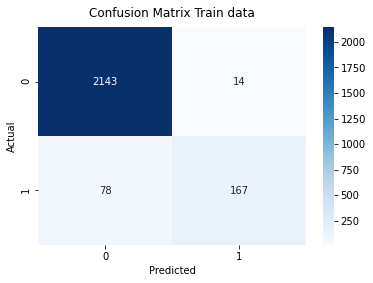

In [130]:
sns.heatmap(confusion_matrix(X_train_concat['Default'], y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Train data', y=1.02)

Text(0.5, 1.02, 'Confusion Matrix Test data')

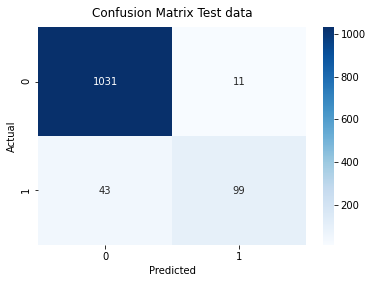

In [131]:
sns.heatmap(confusion_matrix(test_labels, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Test data', y=1.02)

In [132]:
print((classification_report(X_train_concat['Default'], y_train_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2157
           1       0.92      0.68      0.78       245

    accuracy                           0.96      2402
   macro avg       0.94      0.84      0.88      2402
weighted avg       0.96      0.96      0.96      2402



In [133]:
print((classification_report(test_labels, y_test_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1042
           1       0.90      0.70      0.79       142

    accuracy                           0.95      1184
   macro avg       0.93      0.84      0.88      1184
weighted avg       0.95      0.95      0.95      1184



In [134]:
fpr, tpr, threshold = roc_curve(train_labels, y_train_prob_pred)

AUC Training:  0.9645539439697993
AUC Testing:  0.979109783460842


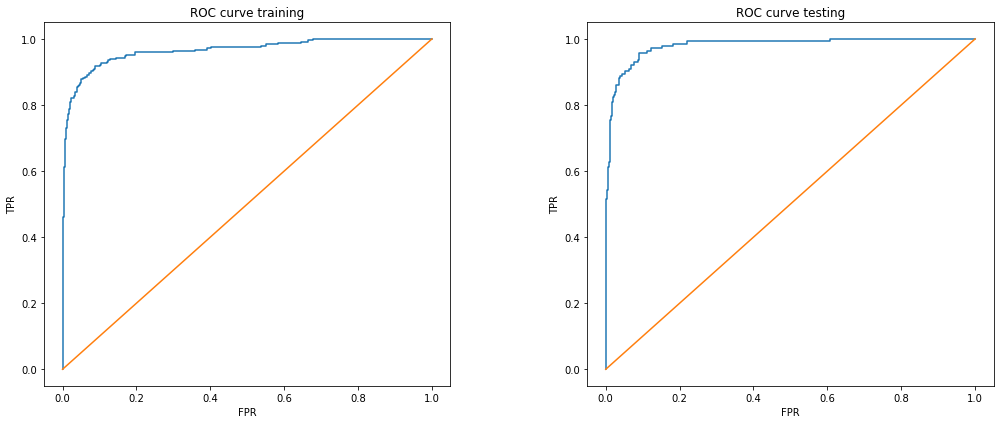

In [135]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1])
plt.title('ROC curve training')
print('AUC Training: ', roc_auc_score(train_labels, y_train_prob_pred))

plt.subplot(1, 2, 2)
fpr_test, tpr_test, threshold_test = roc_curve(test_labels, y_test_prob_pred)
plt.plot(fpr_test, tpr_test)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1])
plt.title('ROC curve testing')
print('AUC Testing: ', roc_auc_score(test_labels, y_test_prob_pred))
plt.tight_layout(w_pad=10)

In [136]:
Optimal_idx = np.argmax(tpr-fpr)
Optimal_threshold = threshold[Optimal_idx]
Optimal_threshold

0.11585320376402199

In [137]:
adj_y_train_pred = np.where(y_train_prob_pred>0.19158, 1, 0)
adj_y_test_pred = np.where(y_test_prob_pred>0.19158, 1, 0)

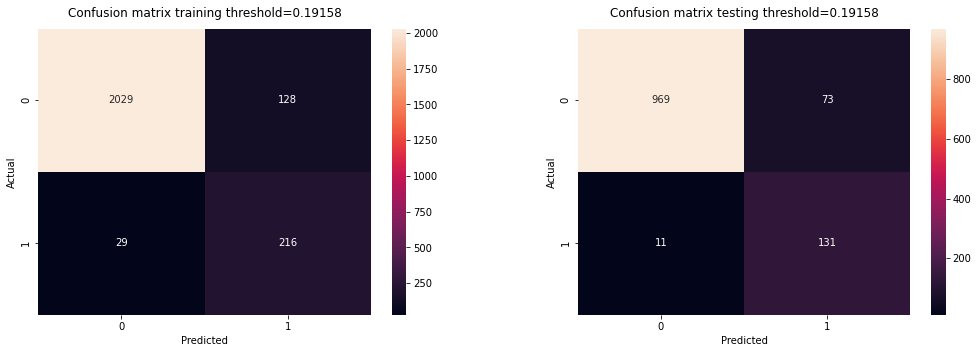

In [138]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(train_labels, adj_y_train_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix training threshold=0.19158', y=1.02)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(test_labels, adj_y_test_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix testing threshold=0.19158', y=1.02)
plt.tight_layout(w_pad=10)

In [139]:
print(classification_report(train_labels, adj_y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2157
           1       0.63      0.88      0.73       245

    accuracy                           0.93      2402
   macro avg       0.81      0.91      0.85      2402
weighted avg       0.95      0.93      0.94      2402



In [140]:
print(classification_report(test_labels, adj_y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1042
           1       0.64      0.92      0.76       142

    accuracy                           0.93      1184
   macro avg       0.82      0.93      0.86      1184
weighted avg       0.95      0.93      0.93      1184



In [141]:
OLS14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.6233
Time:                        23:25:47   Log-Likelihood:                -298.08
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                9.816e-209
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -7.0888      0.444    -15.977      0.000      -7.958      -6.219
Value_of_Output_to_Gross_Block    -0.4179      0.160     -2.616      0.009      -0.731      -0.105
CEPS_annualised_Unit_Curr         -0.9005      0.257     -3.502      0.000      -1.404      -0.396
Curr_Ratio_Latest                 -0.9590      0.158     -6.075      0.000      -1.268      -0.650
Inventory_Ratio_Latest            -0.3094      0.131     -2.366      0.018      -0.566      -0.053
Book_Value_Adj_Unit_Curr          -6.0172      0.534    -11.269      0.000      -7.064      -4.971
PBDTM_perc_Latest                 -0.5190      0.127     -4.087      0.000      -0.768      -0.270
Total_Debt                         0.4095      0.133      3.083      0.002       0.149       0.670
==================================================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Let's perform EDA for the important features

In [142]:
new_df = pd.concat([df_new, df.Default], axis=1)
new_df

Value_of_Output_to_Gross_Block  CEPS_annualised_Unit_Curr  \
0                               0.00                  -13.15875   
1                               0.24                   -0.02000   
2                              -0.26                  -13.15875   
3                               1.90                  -13.15875   
4                               0.05                  -13.15875   
...                              ...                        ...   
3581                            7.76                   21.93125   
3582                            1.00                    9.90000   
3583                            3.24                   21.93125   
3584                            0.68                   17.93000   
3585                            0.49                   21.93125   

      Value_of_Output_to_Total_Assets  Curr_Ratio_Latest  \
0                                0.00               0.02   
1                                0.31               0.08   
2                               -0.03               1.06   
3                                0.24               0.09   
4                                0.01               0.50   
...                               ...                ...   
3581                             0.60               0.00   
3582                             0.29               0.40   
3583                             1.42               0.76   
3584                             0.36               0.85   
3585                             0.42               0.60   

      Inventory_Ratio_Latest  Book_Value_Adj_Unit_Curr  PBDTM_perc_Latest  \
0                       0.00                   -72.365              0.000   
1                      22.35                   -15.180            -21.165   
2                       0.01                    94.140            -21.165   
3                      22.35                   -39.640            -21.165   
4                       0.02                   -72.365            -21.165   
...                      ...                       ...                ...   
3581                    0.00                   139.435              0.000   
3582                    7.16                   114.870             29.810   
3583                    8.78                    69.990              7.310   
3584                   11.42                    99.030             23.390   
3585                   22.35                   139.435             34.040   

      Total_Debt  Default  
0         180.83        1  
1         180.83        1  
2         180.83        1  
3         180.83        1  
4         180.83        1  
...          ...      ...  
3581      180.83        0  
3582      180.83        0  
3583      180.83        0  
3584      180.83        0  
3585      180.83        0  

[3586 rows x 9 columns]

In [143]:
new_df.describe().T

count       mean        std       min  \
Value_of_Output_to_Gross_Block   3586.0   3.356559   4.101482  -6.69000   
CEPS_annualised_Unit_Curr        3586.0   4.816161   8.991216 -13.15875   
Value_of_Output_to_Total_Assets  3586.0   0.730884   0.774996  -0.33000   
Curr_Ratio_Latest                3586.0   2.084084   1.806351   0.00000   
Inventory_Ratio_Latest           3586.0   6.071224   7.311440   0.00000   
Book_Value_Adj_Unit_Curr         3586.0  38.138709  50.129294 -72.36500   
PBDTM_perc_Latest                3586.0   6.667837  15.111930 -21.16500   
Total_Debt                       3586.0  47.439152  68.217338  -0.72000   
Default                          3586.0   0.107920   0.310322   0.00000   

                                   25%     50%      75%        max  
Value_of_Output_to_Gross_Block   0.270   1.530   4.9100   11.87000  
CEPS_annualised_Unit_Curr        0.000   1.145   8.7725   21.93125  
Value_of_Output_to_Total_Assets  0.070   0.480   1.1600    2.79500  
Curr_Ratio_Latest                0.880   1.360   2.7700    5.60500  
Inventory_Ratio_Latest           0.000   3.560   8.9375   22.35000  
Book_Value_Adj_Unit_Curr         7.065  18.925  59.9600  139.43500  
PBDTM_perc_Latest                0.000   4.690  14.1000   35.27500  
Total_Debt                       0.030   7.490  72.3500  180.83000  
Default                          0.000   0.000   0.0000    1.00000

In [144]:
new_df.Default = new_df.Default.astype('object')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Value_of_Output_to_Gross_Block   3586 non-null   float64
 1   CEPS_annualised_Unit_Curr        3586 non-null   float64
 2   Value_of_Output_to_Total_Assets  3586 non-null   float64
 3   Curr_Ratio_Latest                3586 non-null   float64
 4   Inventory_Ratio_Latest           3586 non-null   float64
 5   Book_Value_Adj_Unit_Curr         3586 non-null   float64
 6   PBDTM_perc_Latest                3586 non-null   float64
 7   Total_Debt                       3586 non-null   float64
 8   Default                          3586 non-null   object 
dtypes: float64(8), object(1)
memory usage: 252.3+ KB


(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.]), [])

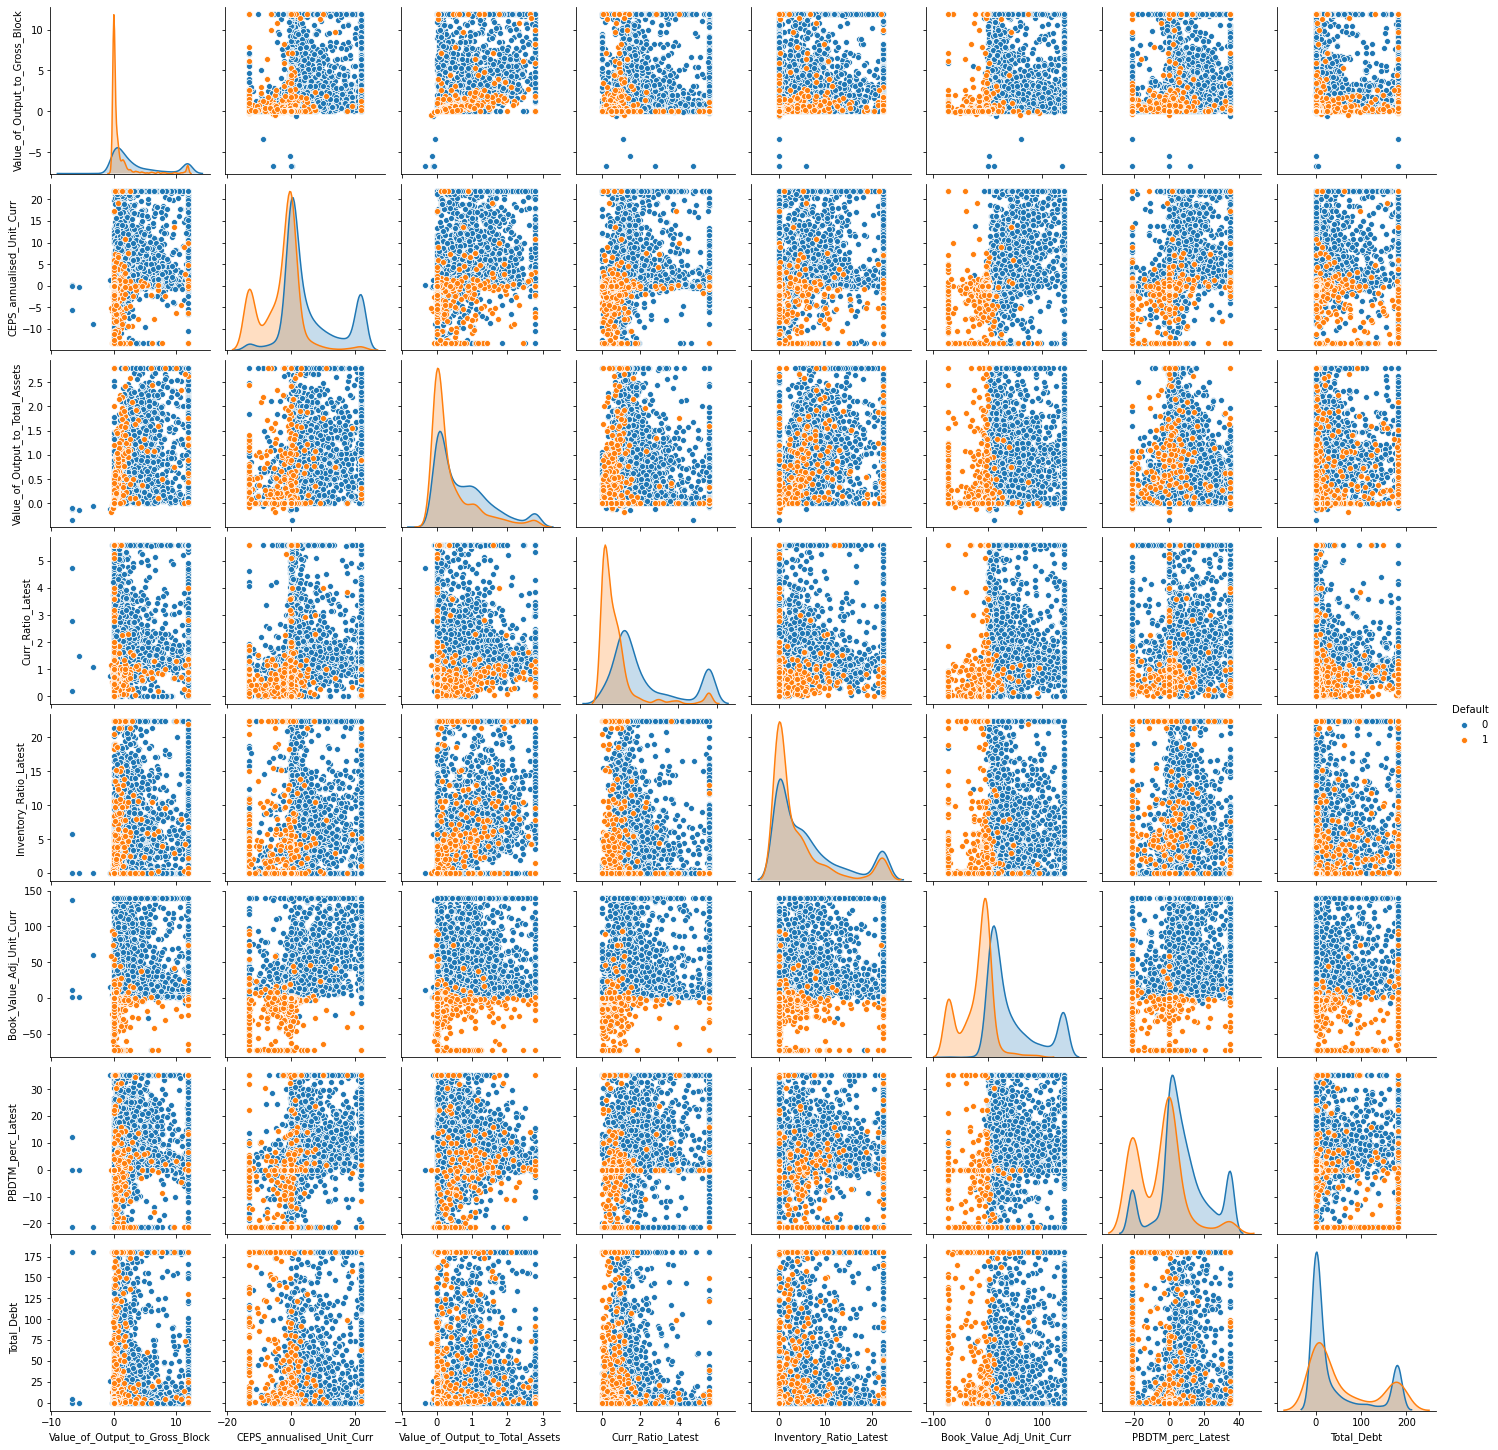

In [145]:
sns.pairplot(data = new_df, hue='Default')
plt.xticks(fontsize=1.2)
plt.yticks(fontsize=1.2)

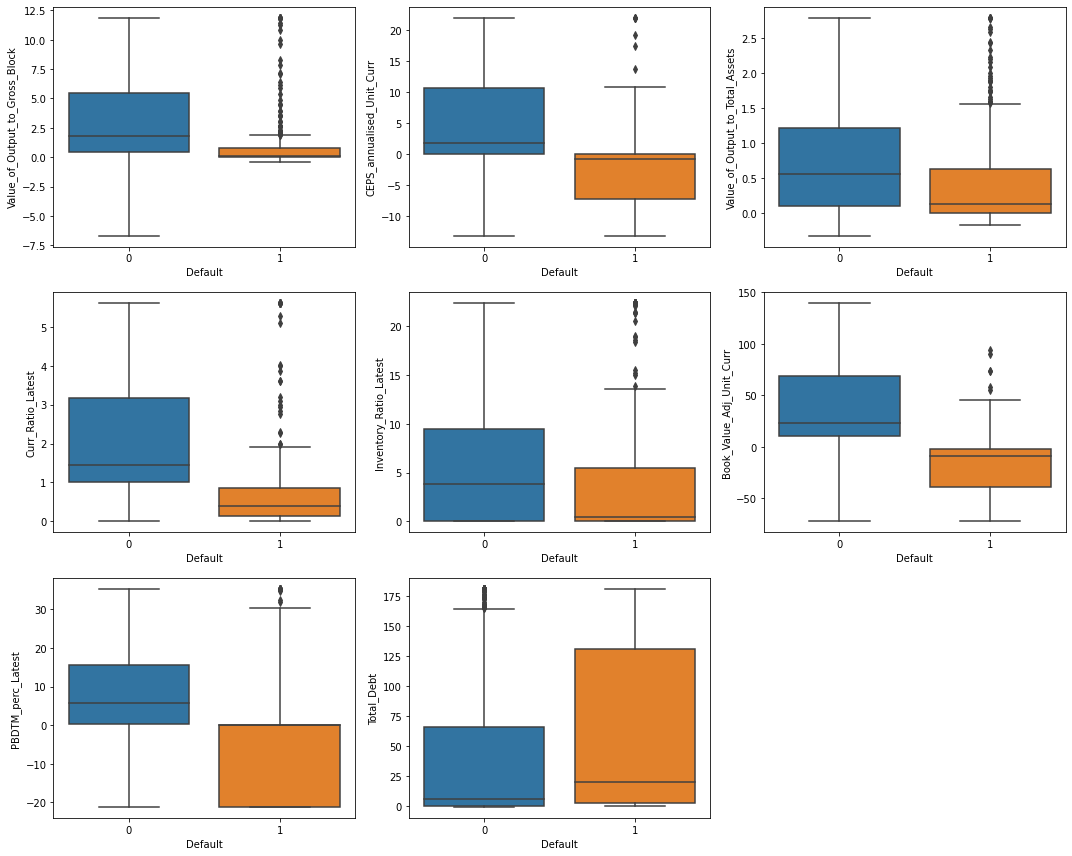

In [146]:
plt.figure(figsize=(15,12))
for i, col in enumerate(new_df.select_dtypes(exclude='object')):
    plt.subplot(3,3, i+1)
    sns.boxplot(data=new_df, x= 'Default', y=col)
    plt.tight_layout()

<AxesSubplot:>

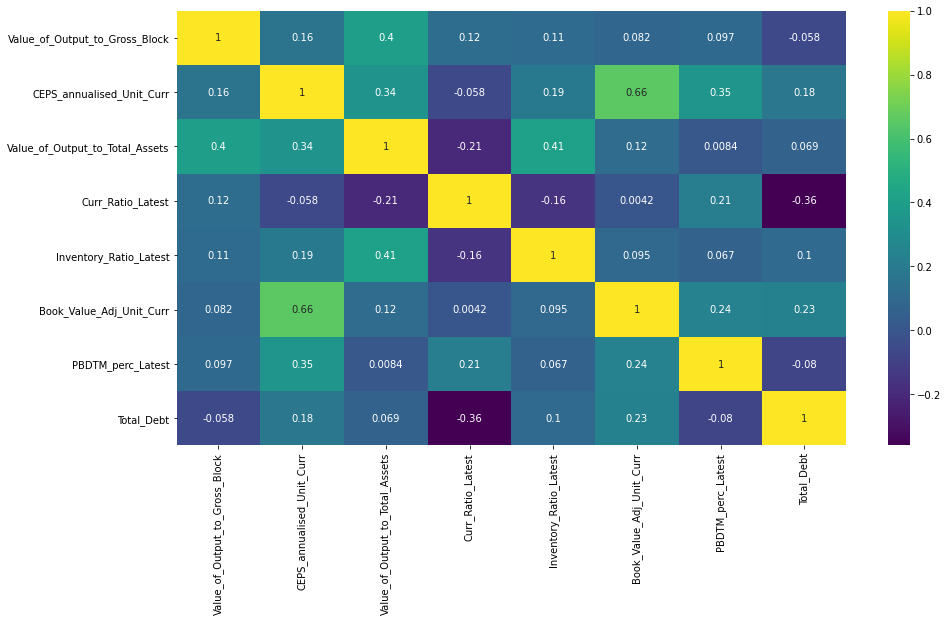

In [147]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(), annot=True, cmap='viridis')

### THE END!!